In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Steps:
# 1. Read data
# 2. Implement euclidean function: broadcast, square, sum, sqrt
# 3. Sort and get k values: np.sort
# 4. Plot

In [109]:
def kNN(x, X, k, Y):
    X = X - x
    X = X * X
    X = np.sum(X, axis=1)
    X = np.sqrt(X)
    knn_y = Y[np.argsort(X, axis=-1)[0:k]]
    return knn_y

# P1: D2z.txt 1NN plot on 2D grid

In [4]:
d2z = pd.read_csv("data/D2z.txt", header=None, delimiter = ' ').to_numpy()

In [5]:
X = d2z[:, :-1]

In [6]:
Y = d2z[:, -1:]

In [7]:
colors_x = list()
colors_y = list()
colors_z = list()
for x in np.arange(-2, 2.1, 0.1):
    for y in np.arange(-2, 2.1, 0.1):
        prediction = kNN([x,y], X, 1, Y)
        colors_x.append(x)
        colors_y.append(y)
        colors_z.append(prediction[0][0])
colors_x = np.array(colors_x)
colors_y = np.array(colors_y)
colors_z = np.array(colors_z)

In [8]:
xin = X.T[0]
x2in = X.T[1]
y_out = Y.T[0]

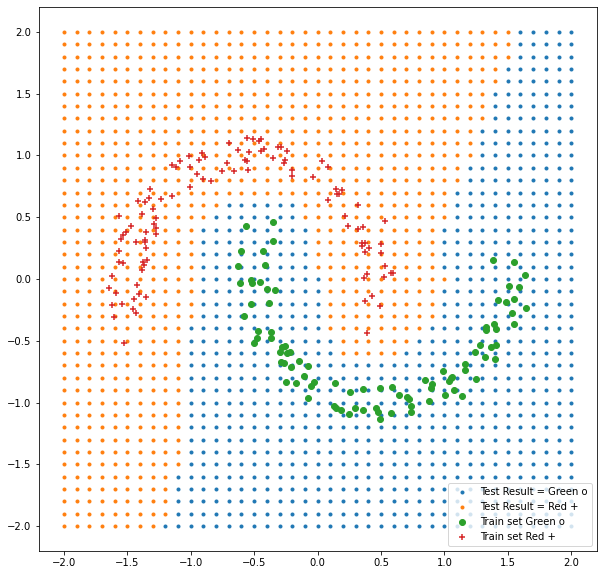

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(colors_x[colors_z==0], colors_y[colors_z==0], marker='.', label='Test Result = Green o')
plt.scatter(colors_x[colors_z==1], colors_y[colors_z==1], marker='.', label='Test Result = Red +')
plt.scatter(xin[y_out==0], x2in[y_out==0], marker='o', label='Train set Green o')
plt.scatter(xin[y_out==1], x2in[y_out==1], marker='+', label='Train set Red +')
plt.legend(loc=4)
plt.savefig("P1_Plot.png")
plt.show()

In [10]:
# Spam Dataset

In [119]:
spam_df = pd.read_csv('data/emails.csv')

In [120]:
sdf_in = spam_df.drop(labels = ['Prediction', 'Email No.'], axis = 1).to_numpy()

In [121]:
sdf_out = pd.DataFrame(spam_df['Prediction']).to_numpy()

In [122]:
# Epsilon
epsilon = 1e-6

In [123]:
def normalize(X):
    mean, std = mean_and_std(X)
    X_normal = (X - mean)/(std+epsilon)
    return X_normal

In [124]:
def mean_and_std(X):
    return np.mean(X, 0, keepdims=True), np.std(X, 0, keepdims=True)

In [125]:
# sdf_in = normalize(sdf_in)

In [126]:
# Training set 1
X_train1 = sdf_in[1000:5000]
X_test1 = sdf_in[:1000]
Y_train1 = sdf_out[1000:5000]
Y_test1 = sdf_out[:1000]
# Training set 2
X_train2 = np.concatenate([sdf_in[:1000], sdf_in[2000:]])
X_test2 = sdf_in[1000:2000]
Y_train2 = np.concatenate([sdf_out[:1000], sdf_out[2000:]])
Y_test2 = sdf_out[1000:2000]
# Training set 3
X_train3 = np.concatenate([sdf_in[:2000], sdf_in[3000:]])
X_test3 = sdf_in[2000:3000]
Y_train3 = np.concatenate([sdf_out[:2000], sdf_out[3000:]])
Y_test3 = sdf_out[2000:3000]
# Training set 4
X_train4 = np.concatenate([sdf_in[:3000], sdf_in[4000:]])
X_test4 = sdf_in[3000:4000]
Y_train4 = np.concatenate([sdf_out[:3000], sdf_out[4000:]])
Y_test4 = sdf_out[3000:4000]
# Training set 5
X_train5 = sdf_in[:4000]
X_test5 = sdf_in[4000:]
Y_train5 = sdf_out[:4000]
Y_test5 = sdf_out[4000:]

# P2: 1NN with 5 fold cross-validation on spam dataset

In [127]:
def compute_metrics(Y_predict, Y, c = 0.5):
    Y_predict = (Y_predict >= c) + 0
    tp = np.sum(np.logical_and(Y==1, Y_predict.T==1))
    fp = np.sum(np.logical_and(Y==0, Y_predict.T==1))
    tn = np.sum(np.logical_and(Y==0, Y_predict.T==0))
    fn = np.sum(np.logical_and(Y==1, Y_predict.T==0))
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return tp, tn, fp, fn, accuracy, precision, recall

In [138]:
def predict(X, Y, X_test, k):
    y_test = []
    for x in X_test:
        knn = kNN(x, X, k, Y)
        y_test.append(np.sum(knn)/k)
    return np.array(y_test)

In [21]:
Y_predict1 = predict(X_train1, Y_train1, X_test1, 1)

In [22]:
tp, tn, fp, fn, accuracy1, precision1, recall1 = compute_metrics(Y_predict1, Y_test1.T[0])

In [23]:
tp, tn, fp, fn, accuracy1, precision1, recall1

(293, 532, 120, 55, 0.825, 0.7094430992736077, 0.8419540229885057)

In [24]:
Y_predict2 = predict(X_train2, Y_train2, X_test2, 1)

In [25]:
tp, tn, fp, fn, accuracy2, precision2, recall2 = compute_metrics(Y_predict2, Y_test2.T[0])

In [26]:
tp, tn, fp, fn, accuracy2, precision2, recall2

(245, 598, 102, 55, 0.843, 0.7060518731988472, 0.8166666666666667)

In [27]:
Y_predict3 = predict(X_train3, Y_train3, X_test3, 1)

In [28]:
tp, tn, fp, fn, accuracy3, precision3, recall3 = compute_metrics(Y_predict3, Y_test3.T[0])

In [29]:
tp, tn, fp, fn, accuracy3, precision3, recall3

(269, 568, 96, 67, 0.837, 0.736986301369863, 0.8005952380952381)

In [30]:
Y_predict4 = predict(X_train4, Y_train4, X_test4, 1)

In [31]:
tp, tn, fp, fn, accuracy4, precision4, recall4 = compute_metrics(Y_predict4, Y_test4.T[0])

In [32]:
tp, tn, fp, fn, accuracy4, precision4, recall4

(267, 577, 111, 45, 0.844, 0.7063492063492064, 0.8557692307692307)

In [33]:
Y_predict5 = predict(X_train5, Y_train5, X_test5, 1)

In [34]:
tp, tn, fp, fn, accuracy5, precision5, recall5 = compute_metrics(Y_predict5, Y_test5.T[0])

In [35]:
tp, tn, fp, fn, accuracy5, precision5, recall5

(278, 546, 104, 72, 0.824, 0.7277486910994765, 0.7942857142857143)

In [36]:
Q2_result = {
    "Fold": [1,2,3,4,5],
    "Accuracy": [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5],
    "Precision": [precision1, precision2, precision3, precision4, precision5],
    "Recall": [recall1, recall3, recall3, recall4, recall5]
}
Q2_df = pd.DataFrame(Q2_result)

In [37]:
Q2_df

,Fold,Accuracy,Precision,Recall
0,1,0.825,0.709443,0.841954
1,2,0.843,0.706052,0.800595
2,3,0.837,0.736986,0.800595
3,4,0.844,0.706349,0.855769
4,5,0.824,0.727749,0.794286


# P4: Average Accuracy vs K: 5-fold-cross-validation

In [129]:
K = [1,3,5,7]
acc = []
accAvg = []

In [130]:
folds = [[X_train1, X_test1, Y_train1, Y_test1],
         [X_train2, X_test2, Y_train2, Y_test2],
         [X_train3, X_test3, Y_train3, Y_test3],
         [X_train4, X_test4, Y_train4, Y_test4],
         [X_train5, X_test5, Y_train5, Y_test5]]

In [131]:
for k in K:
    kAcc = []
    kAccAvg = 0
    for [X_tr, X_ts, Y_tr, Y_ts] in folds:
        Y_pr = predict(X_tr, Y_tr, X_ts, k)
        _, _, _, _, accuracy, _, _ = compute_metrics(Y_pr, Y_ts.T[0])
        kAcc.append(accuracy)
        kAccAvg += accuracy
    acc.append(kAcc)
    accAvg.append(kAccAvg/5)

[1890]
[[1]]
1
1.0
[3499]
[[0]]
0
0.0
[1244]
[[0]]
0
0.0
[131]
[[0]]
0
0.0
[1264]
[[0]]
0
0.0
[1092]
[[0]]
0
0.0
[3408]
[[0]]
0
0.0
[3638]
[[1]]
1
1.0
[1896]
[[1]]
1
1.0
[1066]
[[0]]
0
0.0
[112]
[[1]]
1
1.0
[1558]
[[1]]
1
1.0
[2312]
[[0]]
0
0.0
[2425]
[[1]]
1
1.0
[906]
[[0]]
0
0.0
[1167]
[[0]]
0
0.0
[2521]
[[1]]
1
1.0
[7]
[[0]]
0
0.0
[2577]
[[0]]
0
0.0
[523]
[[0]]
0
0.0
[1876]
[[1]]
1
1.0
[2761]
[[0]]
0
0.0
[3672]
[[0]]
0
0.0
[2988]
[[0]]
0
0.0
[2777]
[[1]]
1
1.0
[1483]
[[0]]
0
0.0
[1176]
[[1]]
1
1.0
[3493]
[[0]]
0
0.0
[3851]
[[1]]
1
1.0
[313]
[[1]]
1
1.0
[502]
[[1]]
1
1.0
[3413]
[[1]]
1
1.0
[2100]
[[1]]
1
1.0
[2516]
[[1]]
1
1.0
[828]
[[0]]
0
0.0
[298]
[[0]]
0
0.0
[3891]
[[0]]
0
0.0
[2268]
[[1]]
1
1.0
[3402]
[[1]]
1
1.0
[3401]
[[1]]
1
1.0
[3603]
[[0]]
0
0.0
[1438]
[[0]]
0
0.0
[2225]
[[0]]
0
0.0
[1550]
[[0]]
0
0.0
[348]
[[0]]
0
0.0
[3275]
[[0]]
0
0.0
[3216]
[[1]]
1
1.0
[1900]
[[0]]
0
0.0
[604]
[[0]]
0
0.0
[2278]
[[0]]
0
0.0
[1958]
[[0]]
0
0.0
[3070]
[[0]]
0
0.0
[492]
[[1]]
1
1.0
[3134]


[2870]
[[0]]
0
0.0
[3837]
[[0]]
0
0.0
[1244]
[[0]]
0
0.0
[814]
[[0]]
0
0.0
[1288]
[[0]]
0
0.0
[2265]
[[0]]
0
0.0
[3308]
[[0]]
0
0.0
[2906]
[[0]]
0
0.0
[2895]
[[0]]
0
0.0
[2191]
[[1]]
1
1.0
[3999]
[[0]]
0
0.0
[1483]
[[0]]
0
0.0
[695]
[[0]]
0
0.0
[313]
[[1]]
1
1.0
[3732]
[[1]]
1
1.0
[3461]
[[0]]
0
0.0
[2920]
[[1]]
1
1.0
[1719]
[[1]]
1
1.0
[486]
[[1]]
1
1.0
[2400]
[[0]]
0
0.0
[1972]
[[1]]
1
1.0
[672]
[[1]]
1
1.0
[3837]
[[0]]
0
0.0
[610]
[[0]]
0
0.0
[2314]
[[0]]
0
0.0
[1653]
[[1]]
1
1.0
[2531]
[[0]]
0
0.0
[2771]
[[0]]
0
0.0
[105]
[[1]]
1
1.0
[1978]
[[0]]
0
0.0
[2225]
[[0]]
0
0.0
[3526]
[[1]]
1
1.0
[1963]
[[1]]
1
1.0
[2203]
[[0]]
0
0.0
[3403]
[[0]]
0
0.0
[2004]
[[0]]
0
0.0
[923]
[[0]]
0
0.0
[669]
[[1]]
1
1.0
[2019]
[[0]]
0
0.0
[925]
[[0]]
0
0.0
[464]
[[1]]
1
1.0
[3057]
[[0]]
0
0.0
[2944]
[[0]]
0
0.0
[1260]
[[0]]
0
0.0
[1784]
[[0]]
0
0.0
[2493]
[[1]]
1
1.0
[2817]
[[0]]
0
0.0
[2946]
[[1]]
1
1.0
[3881]
[[0]]
0
0.0
[3035]
[[1]]
1
1.0
[990]
[[0]]
0
0.0
[11]
[[0]]
0
0.0
[1329]
[[0]]
0
0.0
[1323]


[[0]]
0
0.0
[2571]
[[1]]
1
1.0
[3630]
[[1]]
1
1.0
[3754]
[[1]]
1
1.0
[284]
[[1]]
1
1.0
[2290]
[[1]]
1
1.0
[3543]
[[0]]
0
0.0
[3554]
[[0]]
0
0.0
[3074]
[[1]]
1
1.0
[74]
[[0]]
0
0.0
[1707]
[[1]]
1
1.0
[3077]
[[0]]
0
0.0
[1027]
[[0]]
0
0.0
[488]
[[0]]
0
0.0
[1912]
[[0]]
0
0.0
[2921]
[[0]]
0
0.0
[1252]
[[1]]
1
1.0
[2904]
[[0]]
0
0.0
[916]
[[0]]
0
0.0
[2230]
[[0]]
0
0.0
[661]
[[0]]
0
0.0
[3528]
[[1]]
1
1.0
[2550]
[[0]]
0
0.0
[2606]
[[0]]
0
0.0
[3769]
[[0]]
0
0.0
[3625]
[[0]]
0
0.0
[3633]
[[0]]
0
0.0
[3300]
[[0]]
0
0.0
[3393]
[[0]]
0
0.0
[2225]
[[0]]
0
0.0
[2349]
[[1]]
1
1.0
[481]
[[1]]
1
1.0
[746]
[[0]]
0
0.0
[1890]
[[1]]
1
1.0
[1572]
[[0]]
0
0.0
[2849]
[[0]]
0
0.0
[891]
[[1]]
1
1.0
[2509]
[[1]]
1
1.0
[3765]
[[0]]
0
0.0
[482]
[[0]]
0
0.0
[3799]
[[0]]
0
0.0
[2680]
[[1]]
1
1.0
[1635]
[[1]]
1
1.0
[2354]
[[1]]
1
1.0
[1075]
[[1]]
1
1.0
[3310]
[[0]]
0
0.0
[783]
[[1]]
1
1.0
[1291]
[[0]]
0
0.0
[3758]
[[1]]
1
1.0
[1740]
[[0]]
0
0.0
[3233]
[[0]]
0
0.0
[3921]
[[0]]
0
0.0
[1808]
[[0]]
0
0.0
[1472]
[[1]

[400]
[[0]]
0
0.0
[1453]
[[0]]
0
0.0
[1549]
[[1]]
1
1.0
[1874]
[[1]]
1
1.0
[3452]
[[0]]
0
0.0
[2207]
[[0]]
0
0.0
[2545]
[[0]]
0
0.0
[3778]
[[1]]
1
1.0
[663]
[[0]]
0
0.0
[2107]
[[1]]
1
1.0
[3195]
[[0]]
0
0.0
[1999]
[[1]]
1
1.0
[102]
[[1]]
1
1.0
[3842]
[[0]]
0
0.0
[1273]
[[0]]
0
0.0
[2534]
[[0]]
0
0.0
[3575]
[[1]]
1
1.0
[2571]
[[1]]
1
1.0
[1928]
[[0]]
0
0.0
[53]
[[0]]
0
0.0
[599]
[[0]]
0
0.0
[3639]
[[1]]
1
1.0
[841]
[[0]]
0
0.0
[3789]
[[0]]
0
0.0
[705]
[[1]]
1
1.0
[791]
[[1]]
1
1.0
[1622]
[[0]]
0
0.0
[1754]
[[0]]
0
0.0
[1701]
[[1]]
1
1.0
[3653]
[[1]]
1
1.0
[1323]
[[1]]
1
1.0
[1798]
[[1]]
1
1.0
[3756]
[[0]]
0
0.0
[1748]
[[0]]
0
0.0
[179]
[[0]]
0
0.0
[400]
[[0]]
0
0.0
[1969]
[[0]]
0
0.0
[684]
[[0]]
0
0.0
[1370]
[[0]]
0
0.0
[1950]
[[0]]
0
0.0
[3217]
[[0]]
0
0.0
[206]
[[0]]
0
0.0
[478]
[[0]]
0
0.0
[2430]
[[1]]
1
1.0
[774]
[[1]]
1
1.0
[2536]
[[0]]
0
0.0
[1177]
[[0]]
0
0.0
[1669]
[[1]]
1
1.0
[2402]
[[1]]
1
1.0
[399]
[[0]]
0
0.0
[519]
[[0]]
0
0.0
[3793]
[[0]]
0
0.0
[2390]
[[1]]
1
1.0
[972]
[[0]

[2466]
[[0]]
0
0.0
[2712]
[[0]]
0
0.0
[3452]
[[0]]
0
0.0
[557]
[[1]]
1
1.0
[930]
[[1]]
1
1.0
[3401]
[[1]]
1
1.0
[2750]
[[1]]
1
1.0
[29]
[[1]]
1
1.0
[1022]
[[1]]
1
1.0
[274]
[[0]]
0
0.0
[430]
[[0]]
0
0.0
[3767]
[[1]]
1
1.0
[3210]
[[0]]
0
0.0
[3033]
[[0]]
0
0.0
[1657]
[[0]]
0
0.0
[706]
[[0]]
0
0.0
[2158]
[[1]]
1
1.0
[3575]
[[1]]
1
1.0
[2366]
[[1]]
1
1.0
[992]
[[0]]
0
0.0
[1701]
[[1]]
1
1.0
[2969]
[[0]]
0
0.0
[3637]
[[1]]
1
1.0
[1603]
[[0]]
0
0.0
[459]
[[1]]
1
1.0
[2433]
[[0]]
0
0.0
[33]
[[0]]
0
0.0
[3683]
[[0]]
0
0.0
[2285]
[[0]]
0
0.0
[1398]
[[0]]
0
0.0
[2729]
[[1]]
1
1.0
[1594]
[[1]]
1
1.0
[2244]
[[0]]
0
0.0
[2322]
[[1]]
1
1.0
[2061]
[[0]]
0
0.0
[1773]
[[0]]
0
0.0
[3756]
[[0]]
0
0.0
[3221]
[[0]]
0
0.0
[2428]
[[0]]
0
0.0
[2781]
[[1]]
1
1.0
[3038]
[[1]]
1
1.0
[777]
[[0]]
0
0.0
[2578]
[[1]]
1
1.0
[769]
[[0]]
0
0.0
[3389]
[[0]]
0
0.0
[2083]
[[0]]
0
0.0
[807]
[[1]]
1
1.0
[2304]
[[0]]
0
0.0
[1858]
[[1]]
1
1.0
[2987]
[[0]]
0
0.0
[3116]
[[0]]
0
0.0
[3117]
[[0]]
0
0.0
[1939]
[[0]]
0
0.0
[325]
[

[3579]
[[1]]
1
1.0
[1884]
[[0]]
0
0.0
[3959]
[[0]]
0
0.0
[3656]
[[0]]
0
0.0
[647]
[[0]]
0
0.0
[1359]
[[1]]
1
1.0
[1216]
[[1]]
1
1.0
[3734]
[[0]]
0
0.0
[2911]
[[1]]
1
1.0
[2230]
[[0]]
0
0.0
[2296]
[[0]]
0
0.0
[340]
[[0]]
0
0.0
[3125]
[[1]]
1
1.0
[2349]
[[1]]
1
1.0
[3624]
[[1]]
1
1.0
[198]
[[0]]
0
0.0
[573]
[[0]]
0
0.0
[1677]
[[1]]
1
1.0
[2361]
[[0]]
0
0.0
[2168]
[[0]]
0
0.0
[1778]
[[0]]
0
0.0
[3844]
[[0]]
0
0.0
[3801]
[[0]]
0
0.0
[2]
[[0]]
0
0.0
[1143]
[[1]]
1
1.0
[3637]
[[1]]
1
1.0
[3176]
[[0]]
0
0.0
[974]
[[1]]
1
1.0
[1443]
[[0]]
0
0.0
[3507]
[[0]]
0
0.0
[1255]
[[1]]
1
1.0
[2837]
[[0]]
0
0.0
[2975]
[[1]]
1
1.0
[200]
[[0]]
0
0.0
[412]
[[0]]
0
0.0
[1715]
[[1]]
1
1.0
[2976]
[[1]]
1
1.0
[1927]
[[0]]
0
0.0
[3496]
[[1]]
1
1.0
[488]
[[0]]
0
0.0
[800]
[[1]]
1
1.0
[2455]
[[0]]
0
0.0
[3935]
[[1]]
1
1.0
[3507]
[[0]]
0
0.0
[772]
[[0]]
0
0.0
[2883]
[[1]]
1
1.0
[2411]
[[0]]
0
0.0
[2845]
[[1]]
1
1.0
[3291]
[[0]]
0
0.0
[149]
[[0]]
0
0.0
[2542]
[[0]]
0
0.0
[60]
[[1]]
1
1.0
[1345]
[[0]]
0
0.0
[1086]
[[

[2645]
[[0]]
0
0.0
[410]
[[1]]
1
1.0
[1541]
[[1]]
1
1.0
[3328]
[[0]]
0
0.0
[780]
[[0]]
0
0.0
[1580]
[[0]]
0
0.0
[1378]
[[1]]
1
1.0
[3270]
[[0]]
0
0.0
[2987]
[[0]]
0
0.0
[2348]
[[0]]
0
0.0
[3430]
[[1]]
1
1.0
[3967]
[[1]]
1
1.0
[6]
[[0]]
0
0.0
[1957]
[[0]]
0
0.0
[58]
[[0]]
0
0.0
[3454]
[[0]]
0
0.0
[832]
[[0]]
0
0.0
[3295]
[[1]]
1
1.0
[809]
[[1]]
1
1.0
[2140]
[[0]]
0
0.0
[478]
[[0]]
0
0.0
[1162]
[[0]]
0
0.0
[415]
[[1]]
1
1.0
[568]
[[0]]
0
0.0
[457]
[[0]]
0
0.0
[1148]
[[1]]
1
1.0
[997]
[[0]]
0
0.0
[2016]
[[1]]
1
1.0
[3679]
[[0]]
0
0.0
[1738]
[[0]]
0
0.0
[2838]
[[0]]
0
0.0
[625]
[[0]]
0
0.0
[3976]
[[1]]
1
1.0
[2503]
[[0]]
0
0.0
[3134]
[[0]]
0
0.0
[1164]
[[0]]
0
0.0
[248]
[[1]]
1
1.0
[3250]
[[0]]
0
0.0
[1799]
[[1]]
1
1.0
[2866]
[[0]]
0
0.0
[2855]
[[0]]
0
0.0
[3250]
[[0]]
0
0.0
[3860]
[[1]]
1
1.0
[1924]
[[1]]
1
1.0
[1135]
[[1]]
1
1.0
[3581]
[[1]]
1
1.0
[1318]
[[0]]
0
0.0
[2117]
[[0]]
0
0.0
[2245]
[[0]]
0
0.0
[1047]
[[1]]
1
1.0
[1616]
[[0]]
0
0.0
[654]
[[0]]
0
0.0
[2551]
[[0]]
0
0.0
[478]
[[0]

[2412]
[[0]]
0
0.0
[3632]
[[1]]
1
1.0
[1132]
[[1]]
1
1.0
[970]
[[0]]
0
0.0
[3750]
[[0]]
0
0.0
[1320]
[[0]]
0
0.0
[3554]
[[0]]
0
0.0
[1485]
[[1]]
1
1.0
[3999]
[[0]]
0
0.0
[3155]
[[0]]
0
0.0
[1765]
[[0]]
0
0.0
[3292]
[[0]]
0
0.0
[2710]
[[0]]
0
0.0
[557]
[[1]]
1
1.0
[60]
[[1]]
1
1.0
[1969]
[[0]]
0
0.0
[3316]
[[0]]
0
0.0
[2158]
[[0]]
0
0.0
[3768]
[[0]]
0
0.0
[721]
[[1]]
1
1.0
[583]
[[0]]
0
0.0
[3612]
[[0]]
0
0.0
[3234]
[[0]]
0
0.0
[3518]
[[1]]
1
1.0
[3965]
[[0]]
0
0.0
[930]
[[1]]
1
1.0
[1925]
[[0]]
0
0.0
[3391]
[[0]]
0
0.0
[362]
[[0]]
0
0.0
[1822]
[[0]]
0
0.0
[2764]
[[0]]
0
0.0
[391]
[[1]]
1
1.0
[2726]
[[0]]
0
0.0
[2777]
[[0]]
0
0.0
[2103]
[[1]]
1
1.0
[3147]
[[0]]
0
0.0
[407]
[[1]]
1
1.0
[66]
[[1]]
1
1.0
[518]
[[0]]
0
0.0
[754]
[[0]]
0
0.0
[1208]
[[1]]
1
1.0
[859]
[[1]]
1
1.0
[2652]
[[1]]
1
1.0
[1601]
[[1]]
1
1.0
[326]
[[1]]
1
1.0
[3805]
[[0]]
0
0.0
[1534]
[[1]]
1
1.0
[2031]
[[0]]
0
0.0
[3888]
[[0]]
0
0.0
[2963]
[[1]]
1
1.0
[3238]
[[0]]
0
0.0
[3445]
[[0]]
0
0.0
[1715]
[[1]]
1
1.0
[133]
[[1

[1402]
[[0]]
0
0.0
[3337]
[[1]]
1
1.0
[3165]
[[0]]
0
0.0
[23]
[[1]]
1
1.0
[1244]
[[0]]
0
0.0
[2224]
[[0]]
0
0.0
[708]
[[0]]
0
0.0
[1035]
[[0]]
0
0.0
[759]
[[0]]
0
0.0
[604]
[[0]]
0
0.0
[3776]
[[1]]
1
1.0
[3997]
[[0]]
0
0.0
[94]
[[0]]
0
0.0
[2712]
[[0]]
0
0.0
[2707]
[[1]]
1
1.0
[1027]
[[1]]
1
1.0
[1547]
[[1]]
1
1.0
[1305]
[[1]]
1
1.0
[1302]
[[0]]
0
0.0
[1176]
[[0]]
0
0.0
[2649]
[[1]]
1
1.0
[1616]
[[0]]
0
0.0
[2614]
[[0]]
0
0.0
[2387]
[[0]]
0
0.0
[181]
[[1]]
1
1.0
[565]
[[1]]
1
1.0
[2380]
[[0]]
0
0.0
[3593]
[[0]]
0
0.0
[3987]
[[1]]
1
1.0
[3200]
[[0]]
0
0.0
[754]
[[0]]
0
0.0
[374]
[[0]]
0
0.0
[1222]
[[0]]
0
0.0
[3138]
[[0]]
0
0.0
[3518]
[[1]]
1
1.0
[3202]
[[0]]
0
0.0
[3045]
[[0]]
0
0.0
[1385]
[[0]]
0
0.0
[1833]
[[1]]
1
1.0
[2638]
[[1]]
1
1.0
[3062]
[[0]]
0
0.0
[2041]
[[1]]
1
1.0
[362]
[[0]]
0
0.0
[3482]
[[0]]
0
0.0
[317]
[[1]]
1
1.0
[2894]
[[1]]
1
1.0
[648]
[[1]]
1
1.0
[471]
[[0]]
0
0.0
[3085]
[[1]]
1
1.0
[2267]
[[0]]
0
0.0
[801]
[[0]]
0
0.0
[328]
[[1]]
1
1.0
[3238]
[[0]]
0
0.0
[1046]
[[0

[2587]
[[0]]
0
0.0
[821]
[[1]]
1
1.0
[3641]
[[0]]
0
0.0
[3450]
[[0]]
0
0.0
[2243]
[[0]]
0
0.0
[2767]
[[0]]
0
0.0
[2992]
[[0]]
0
0.0
[3700]
[[0]]
0
0.0
[446]
[[0]]
0
0.0
[1911]
[[0]]
0
0.0
[2822]
[[0]]
0
0.0
[1887]
[[1]]
1
1.0
[2753]
[[0]]
0
0.0
[7]
[[1]]
1
1.0
[2937]
[[0]]
0
0.0
[973]
[[1]]
1
1.0
[1564]
[[0]]
0
0.0
[3258]
[[0]]
0
0.0
[3184]
[[1]]
1
1.0
[3829]
[[0]]
0
0.0
[2710]
[[0]]
0
0.0
[3821]
[[1]]
1
1.0
[3656]
[[0]]
0
0.0
[242]
[[0]]
0
0.0
[928]
[[1]]
1
1.0
[2320]
[[0]]
0
0.0
[1436]
[[1]]
1
1.0
[487]
[[0]]
0
0.0
[1579]
[[0]]
0
0.0
[2496]
[[0]]
0
0.0
[356]
[[0]]
0
0.0
[2041]
[[1]]
1
1.0
[743]
[[0]]
0
0.0
[1792]
[[0]]
0
0.0
[2474]
[[0]]
0
0.0
[69]
[[1]]
1
1.0
[1033]
[[1]]
1
1.0
[3862]
[[1]]
1
1.0
[2014]
[[1]]
1
1.0
[3625]
[[0]]
0
0.0
[3619]
[[1]]
1
1.0
[705]
[[1]]
1
1.0
[467]
[[0]]
0
0.0
[3988]
[[0]]
0
0.0
[3171]
[[0]]
0
0.0
[3590]
[[0]]
0
0.0
[666]
[[0]]
0
0.0
[413]
[[1]]
1
1.0
[2252]
[[1]]
1
1.0
[1604]
[[0]]
0
0.0
[3101]
[[1]]
1
1.0
[3700]
[[0]]
0
0.0
[2085]
[[0]]
0
0.0
[657]
[[0]

[2041]
[[1]]
1
1.0
[2820]
[[0]]
0
0.0
[1196]
[[0]]
0
0.0
[2382]
[[1]]
1
1.0
[288]
[[1]]
1
1.0
[206]
[[0]]
0
0.0
[2865]
[[0]]
0
0.0
[190]
[[1]]
1
1.0
[1313]
[[1]]
1
1.0
[2530]
[[0]]
0
0.0
[3780]
[[1]]
1
1.0
[1728]
[[1]]
1
1.0
[2225]
[[0]]
0
0.0
[1781]
[[0]]
0
0.0
[1313]
[[1]]
1
1.0
[153]
[[0]]
0
0.0
[2129]
[[0]]
0
0.0
[3262]
[[1]]
1
1.0
[164]
[[1]]
1
1.0
[2331]
[[0]]
0
0.0
[3571]
[[1]]
1
1.0
[1975]
[[0]]
0
0.0
[2772]
[[1]]
1
1.0
[1911]
[[0]]
0
0.0
[1080]
[[1]]
1
1.0
[3565]
[[0]]
0
0.0
[2909]
[[0]]
0
0.0
[2416]
[[0]]
0
0.0
[3475]
[[0]]
0
0.0
[71]
[[0]]
0
0.0
[269]
[[0]]
0
0.0
[2107]
[[0]]
0
0.0
[2529]
[[1]]
1
1.0
[391]
[[1]]
1
1.0
[1631]
[[0]]
0
0.0
[2860]
[[0]]
0
0.0
[3809]
[[0]]
0
0.0
[716]
[[0]]
0
0.0
[3989]
[[0]]
0
0.0
[799]
[[1]]
1
1.0
[3421]
[[0]]
0
0.0
[2263]
[[1]]
1
1.0
[2780]
[[0]]
0
0.0
[3597]
[[0]]
0
0.0
[646]
[[0]]
0
0.0
[1776]
[[1]]
1
1.0
[1287]
[[1]]
1
1.0
[1855]
[[0]]
0
0.0
[1961]
[[0]]
0
0.0
[485]
[[1]]
1
1.0
[2843]
[[0]]
0
0.0
[1000]
[[0]]
0
0.0
[2320]
[[0]]
0
0.0
[2738]

[493]
[[0]]
0
0.0
[872]
[[1]]
1
1.0
[3855]
[[0]]
0
0.0
[1336]
[[1]]
1
1.0
[3374]
[[0]]
0
0.0
[3483]
[[0]]
0
0.0
[2820]
[[0]]
0
0.0
[3153]
[[0]]
0
0.0
[805]
[[1]]
1
1.0
[3374]
[[0]]
0
0.0
[1051]
[[0]]
0
0.0
[564]
[[0]]
0
0.0
[2129]
[[0]]
0
0.0
[40]
[[1]]
1
1.0
[2011]
[[1]]
1
1.0
[3728]
[[1]]
1
1.0
[1799]
[[1]]
1
1.0
[3359]
[[0]]
0
0.0
[151]
[[1]]
1
1.0
[2533]
[[0]]
0
0.0
[1480]
[[1]]
1
1.0
[3681]
[[0]]
0
0.0
[743]
[[0]]
0
0.0
[2525]
[[0]]
0
0.0
[18]
[[0]]
0
0.0
[1196]
[[0]]
0
0.0
[3621]
[[0]]
0
0.0
[1228]
[[0]]
0
0.0
[3788]
[[0]]
0
0.0
[3491]
[[1]]
1
1.0
[2767]
[[0]]
0
0.0
[3107]
[[1]]
1
1.0
[1655]
[[0]]
0
0.0
[2401]
[[0]]
0
0.0
[2294]
[[0]]
0
0.0
[3694]
[[0]]
0
0.0
[3834]
[[0]]
0
0.0
[1045]
[[0]]
0
0.0
[720]
[[0]]
0
0.0
[9]
[[0]]
0
0.0
[1723]
[[0]]
0
0.0
[121]
[[1]]
1
1.0
[1787]
[[1]]
1
1.0
[1944]
[[0]]
0
0.0
[3726]
[[0]]
0
0.0
[398]
[[0]]
0
0.0
[1713]
[[1]]
1
1.0
[2724]
[[0]]
0
0.0
[2220]
[[1]]
1
1.0
[654]
[[0]]
0
0.0
[1248]
[[1]]
1
1.0
[3882]
[[0]]
0
0.0
[3310]
[[1]]
1
1.0
[962]
[[0]

[[1]
 [1]
 [0]]
2
0.6666666666666666
[3470 1107 3128]
[[0]
 [0]
 [0]]
0
0.0
[2161  813 2584]
[[0]
 [0]
 [0]]
0
0.0
[1123 2385 3964]
[[0]
 [0]
 [0]]
0
0.0
[3601  303 2862]
[[1]
 [1]
 [1]]
3
1.0
[2626 2360  584]
[[0]
 [0]
 [0]]
0
0.0
[3470 2914 3119]
[[0]
 [0]
 [0]]
0
0.0
[3674  520 2748]
[[0]
 [0]
 [0]]
0
0.0
[1771  672 1270]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[3295 1680 3074]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[2100 1558 2663]
[[1]
 [1]
 [1]]
3
1.0
[2923 3337  776]
[[1]
 [1]
 [1]]
3
1.0
[3454 1614 1461]
[[0]
 [0]
 [0]]
0
0.0
[3752 1819 3341]
[[1]
 [1]
 [1]]
3
1.0
[ 512 3237 3337]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[ 394   67 3196]
[[0]
 [0]
 [0]]
0
0.0
[891 112  93]
[[1]
 [1]
 [1]]
3
1.0
[2662 3950 3730]
[[1]
 [1]
 [1]]
3
1.0
[3635  173 1358]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[1123  925 3025]
[[0]
 [0]
 [0]]
0
0.0
[3450 1528 2945]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[2718 3450  318]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[892 206 479]
[[0]
 [0]
 [0]]
0
0.0
[3457  338  259]
[[1]

[[1]
 [1]
 [1]]
3
1.0
[3578   88 1751]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[  22 2871 3635]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[1460 3841  678]
[[0]
 [0]
 [0]]
0
0.0
[3746  505  295]
[[0]
 [0]
 [0]]
0
0.0
[1908 3996 1564]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[3578  623 1952]
[[1]
 [1]
 [1]]
3
1.0
[3314 3923 1649]
[[1]
 [1]
 [1]]
3
1.0
[3204  317 3241]
[[0]
 [0]
 [0]]
0
0.0
[1041 2346 2712]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[3039 2625 1226]
[[0]
 [0]
 [0]]
0
0.0
[2236  958 1974]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[1953  844 3748]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[1552 3719 2320]
[[1]
 [1]
 [1]]
3
1.0
[3999 3710 3029]
[[0]
 [0]
 [0]]
0
0.0
[  80 1528 2322]
[[1]
 [1]
 [1]]
3
1.0
[3385  148 3066]
[[1]
 [1]
 [1]]
3
1.0
[2368 1911  323]
[[0]
 [0]
 [0]]
0
0.0
[ 135 1806 2273]
[[1]
 [1]
 [1]]
3
1.0
[3134 3257 1697]
[[0]
 [0]
 [0]]
0
0.0
[1139 1824 1217]
[[0]
 [0]
 [0]]
0
0.0
[1264 3945  265]
[[0]
 [0]
 [0]]
0
0.0
[3438 1923 1951]
[[1]
 [1]
 [1]]
3
1.0
[3839 1963 1759]
[[1]
 [1]
 [1

[ 922 1704 1474]
[[0]
 [0]
 [0]]
0
0.0
[2166 3858  171]
[[0]
 [0]
 [0]]
0
0.0
[ 305 1858 1652]
[[1]
 [1]
 [1]]
3
1.0
[2016 3453 1874]
[[1]
 [1]
 [1]]
3
1.0
[ 181  636 2126]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[2804 3885 3306]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[ 852 3444   78]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3265 1766  566]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[3837 3016 1471]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3113 1816 1096]
[[0]
 [0]
 [0]]
0
0.0
[1129 3350 3455]
[[0]
 [0]
 [0]]
0
0.0
[1876 2712 2982]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[3758 2145  447]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[1945 2398 2511]
[[1]
 [1]
 [1]]
3
1.0
[2100 1180 1169]
[[1]
 [1]
 [1]]
3
1.0
[3317 1636 1304]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3046 3774 3421]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[ 395 1187  604]
[[0]
 [0]
 [0]]
0
0.0
[ 300 3229 1325]
[[0]
 [0]
 [0]]
0
0.0
[3199  683 1996]
[[0]
 [0]
 [0]]
0
0.0
[ 487 1498 3553]
[[0]
 [0]
 [0]]
0
0.0
[2900  693 1300]
[[1]
 [1]
 [0]]
2
0.666666666

[1821 2862 1459]
[[1]
 [1]
 [1]]
3
1.0
[1480 3528 1926]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1460 3841  678]
[[0]
 [0]
 [0]]
0
0.0
[3767 1131 3150]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3345 3810 3181]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[2315 1473  494]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[3360 2817 1412]
[[0]
 [0]
 [0]]
0
0.0
[3197 1456 1886]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1123 1396 1222]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[3728  568 3084]
[[1]
 [1]
 [1]]
3
1.0
[1117 3011 2425]
[[1]
 [1]
 [1]]
3
1.0
[3072  651 3751]
[[0]
 [0]
 [0]]
0
0.0
[3768 2023 2073]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1073  449 2087]
[[0]
 [0]
 [0]]
0
0.0
[1336 1189 1786]
[[0]
 [0]
 [0]]
0
0.0
[2728 1084  818]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[  59 2022 3661]
[[0]
 [0]
 [0]]
0
0.0
[2309 2851 1525]
[[0]
 [0]
 [0]]
0
0.0
[2850 2210 2284]
[[0]
 [0]
 [0]]
0
0.0
[2301  249 2037]
[[0]
 [0]
 [0]]
0
0.0
[1107 3603 3745]
[[0]
 [0]
 [0]]
0
0.0
[2431 2523 3149]
[[0]
 [0]
 [0]]
0
0.0
[1649 1789 2501]
[[1]


[2230 3602 1519]
[[0]
 [0]
 [0]]
0
0.0
[ 661 1826   26]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3528 1876 1844]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[2550  562 3913]
[[0]
 [0]
 [0]]
0
0.0
[2606 2155 3178]
[[0]
 [0]
 [0]]
0
0.0
[3769 1911 3182]
[[0]
 [0]
 [0]]
0
0.0
[3625  230 3714]
[[0]
 [0]
 [0]]
0
0.0
[3633 1283 2222]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[3300  417 1350]
[[0]
 [0]
 [0]]
0
0.0
[3393 3586  437]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[2225 2562  265]
[[0]
 [0]
 [0]]
0
0.0
[2349 2273 2871]
[[1]
 [1]
 [1]]
3
1.0
[ 481 2508 1712]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[746 975 204]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1890 1740 2121]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[1572 3250 1523]
[[0]
 [0]
 [0]]
0
0.0
[2849 1259 3976]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[ 891 2926  599]
[[1]
 [1]
 [1]]
3
1.0
[2509  320  344]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3765  526  504]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[ 482 2956 3142]
[[0]
 [0]
 [0]]
0
0.0
[3799  584 1351]
[[0]
 [0]
 [0]]
0

[2646 1869 3973]
[[0]
 [0]
 [0]]
0
0.0
[ 133  670 3767]
[[1]
 [1]
 [1]]
3
1.0
[3160  123 3404]
[[0]
 [0]
 [0]]
0
0.0
[3659 3602 1230]
[[0]
 [0]
 [0]]
0
0.0
[1996 1362 3199]
[[0]
 [0]
 [0]]
0
0.0
[1114 2180  929]
[[0]
 [0]
 [0]]
0
0.0
[2147 3230 3360]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1539 2366 1965]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1957  657 2284]
[[0]
 [0]
 [0]]
0
0.0
[458 215 250]
[[1]
 [1]
 [1]]
3
1.0
[3714  781 3959]
[[0]
 [0]
 [0]]
0
0.0
[ 169 2652  292]
[[1]
 [1]
 [1]]
3
1.0
[ 398 1989 3369]
[[0]
 [0]
 [0]]
0
0.0
[2076  800 1166]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[1683 2577 1387]
[[0]
 [0]
 [0]]
0
0.0
[1839 1934 2050]
[[1]
 [1]
 [1]]
3
1.0
[1232 2468 3249]
[[0]
 [0]
 [0]]
0
0.0
[ 494 1861 3035]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1513  407 1839]
[[1]
 [1]
 [1]]
3
1.0
[1954 3404  113]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[3436 2598  184]
[[1]
 [1]
 [1]]
3
1.0
[2297 3757 1895]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[2149 1630  961]
[[1]
 [1]
 [1]]
3
1.0
[2987  783 1787]

[1887 2599 1014]
[[1]
 [1]
 [1]]
3
1.0
[1048  339 3570]
[[0]
 [0]
 [0]]
0
0.0
[2985  466 1472]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[2402 3294  662]
[[1]
 [1]
 [1]]
3
1.0
[  35   49 2278]
[[0]
 [0]
 [0]]
0
0.0
[2190 3350 3455]
[[0]
 [0]
 [0]]
0
0.0
[ 550 3229 1325]
[[0]
 [0]
 [0]]
0
0.0
[3418  897 1488]
[[0]
 [0]
 [0]]
0
0.0
[ 443 1917 1889]
[[0]
 [0]
 [0]]
0
0.0
[3601  145 2862]
[[1]
 [1]
 [1]]
3
1.0
[587 836 387]
[[0]
 [0]
 [0]]
0
0.0
[2571  758 1662]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3545 3066 2444]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[2699 3816 3036]
[[1]
 [1]
 [1]]
3
1.0
[2980 1835 3027]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1611 3913 1367]
[[0]
 [0]
 [0]]
0
0.0
[1828 1126 3628]
[[0]
 [0]
 [0]]
0
0.0
[3347  859 3428]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[1979 3739 3137]
[[0]
 [0]
 [0]]
0
0.0
[3453   29  458]
[[1]
 [1]
 [1]]
3
1.0
[ 633 2803 3184]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[1996 1362 3199]
[[0]
 [0]
 [0]]
0
0.0
[1478 2680 1116]
[[1]
 [1]
 [1]]
3
1.0
[3204 3241 3391]

[ 897 2551 2232]
[[0]
 [0]
 [0]]
0
0.0
[ 451 1208  614]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1941 2717 1955]
[[0]
 [0]
 [0]]
0
0.0
[1009  425 1017]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3752  272   52]
[[1]
 [1]
 [1]]
3
1.0
[1128 1474 2648]
[[0]
 [0]
 [0]]
0
0.0
[1377 3709 3674]
[[0]
 [0]
 [0]]
0
0.0
[ 902  487 2944]
[[0]
 [0]
 [0]]
0
0.0
[1418 3768 2872]
[[0]
 [0]
 [0]]
0
0.0
[1140 1318 3670]
[[1]
 [1]
 [1]]
3
1.0
[ 131 1797  599]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[1287 2465  185]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3837 2659 3008]
[[0]
 [0]
 [0]]
0
0.0
[3290 2352 1981]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[  30 3595 3681]
[[1]
 [1]
 [1]]
3
1.0
[1817 1224 2559]
[[0]
 [0]
 [0]]
0
0.0
[2867 2982 3653]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[3746 3807 3593]
[[0]
 [0]
 [0]]
0
0.0
[ 944 1621  458]
[[1]
 [1]
 [1]]
3
1.0
[1009  425 1017]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[ 663 1575 1888]
[[0]
 [0]
 [0]]
0
0.0
[2234 2434 3661]
[[0]
 [0]
 [0]]
0
0.0
[2510 3246  374]
[[0]
 [0]
 [0]]
0
0.

[ 898 1912 3310]
[[0]
 [0]
 [0]]
0
0.0
[1996 1362 3199]
[[0]
 [0]
 [0]]
0
0.0
[3709 2748 3921]
[[0]
 [0]
 [0]]
0
0.0
[2987  202 2139]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[2336 1950 1737]
[[0]
 [0]
 [0]]
0
0.0
[3049 3973 1745]
[[0]
 [0]
 [0]]
0
0.0
[2493  199 2300]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[ 430  847 3924]
[[0]
 [0]
 [0]]
0
0.0
[ 597  991 3033]
[[0]
 [0]
 [0]]
0
0.0
[3157 2327   28]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[2190 3350 3455]
[[0]
 [0]
 [0]]
0
0.0
[1272 1300  188]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[1950 1358 3799]
[[0]
 [0]
 [0]]
0
0.0
[ 457 1229  914]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[ 919 1041   20]
[[1]
 [1]
 [1]]
3
1.0
[3760 1652 1662]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[3761 3145 1951]
[[1]
 [1]
 [1]]
3
1.0
[2260  741 3778]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1059 2840 1950]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[3456 1731 2574]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[924 897  53]
[[0]
 [0]
 [0]]
0
0.0
[2945  529  429]
[[0]
 [1]
 [1]]
2
0.666666666666

[3347 1715 1261]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1167   15 1844]
[[0]
 [0]
 [0]]
0
0.0
[2428  803 1305]
[[0]
 [0]
 [0]]
0
0.0
[1886  715 3261]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[ 487 2944 3185]
[[0]
 [0]
 [0]]
0
0.0
[2613  727 2314]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[1072 1692 2763]
[[0]
 [0]
 [0]]
0
0.0
[ 854 3749  953]
[[0]
 [0]
 [0]]
0
0.0
[ 430  847 3924]
[[0]
 [0]
 [0]]
0
0.0
[ 283 1568 1222]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3290  459 1461]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1314 2055 2257]
[[0]
 [0]
 [0]]
0
0.0
[3011 2491 1014]
[[1]
 [1]
 [1]]
3
1.0
[2399 2574 3428]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[2428  803 1305]
[[0]
 [0]
 [0]]
0
0.0
[3420 1726 1443]
[[0]
 [0]
 [0]]
0
0.0
[ 920 3216   46]
[[1]
 [1]
 [1]]
3
1.0
[ 163 2756 2305]
[[0]
 [0]
 [0]]
0
0.0
[ 220 1046 3277]
[[0]
 [0]
 [0]]
0
0.0
[1258 3347 2726]
[[0]
 [0]
 [0]]
0
0.0
[1865  659 1701]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1596 1105 1929]
[[0]
 [0]
 [0]]
0
0.0
[ 717 2390 1821]
[[1]
 [1]
 [1]]
3
1.

[3086 3961  308]
[[0]
 [0]
 [0]]
0
0.0
[2247 3291 2808]
[[0]
 [0]
 [0]]
0
0.0
[1993 3667 3585]
[[1]
 [1]
 [1]]
3
1.0
[   9 3920 3254]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[2551 2104  131]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3999  349  455]
[[0]
 [0]
 [0]]
0
0.0
[3250 1952 3451]
[[0]
 [0]
 [0]]
0
0.0
[3375 2408 2553]
[[0]
 [0]
 [0]]
0
0.0
[ 312 3743 2179]
[[0]
 [0]
 [0]]
0
0.0
[1738 1881 2503]
[[0]
 [0]
 [0]]
0
0.0
[1449 2087 1767]
[[0]
 [0]
 [0]]
0
0.0
[1622 1572 1704]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[928 368 995]
[[1]
 [1]
 [1]]
3
1.0
[2723  580 2490]
[[0]
 [0]
 [0]]
0
0.0
[1658  984  367]
[[0]
 [0]
 [0]]
0
0.0
[1937 1015 3896]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3511 3229 1300]
[[0]
 [0]
 [0]]
0
0.0
[2073 1073 3743]
[[0]
 [0]
 [0]]
0
0.0
[2366  400 3420]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[2749  947 3683]
[[0]
 [0]
 [0]]
0
0.0
[2369  233 3358]
[[0]
 [0]
 [0]]
0
0.0
[2075 3849  410]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[ 136 3538 2071]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[

[2976 3899  202]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[1927 2729 1894]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[3496  190 2913]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[ 488 2944  487]
[[0]
 [0]
 [0]]
0
0.0
[ 800 1544  865]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[2455 2025 1122]
[[0]
 [0]
 [0]]
0
0.0
[3935 3480  665]
[[1]
 [1]
 [1]]
3
1.0
[3507 1265    4]
[[0]
 [0]
 [0]]
0
0.0
[ 772 2802 2909]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[2883 1080 3804]
[[1]
 [1]
 [1]]
3
1.0
[2411 2603 2102]
[[0]
 [0]
 [0]]
0
0.0
[2845  357  459]
[[1]
 [1]
 [1]]
3
1.0
[3291 2247 2808]
[[0]
 [0]
 [0]]
0
0.0
[ 149 1727   79]
[[0]
 [0]
 [0]]
0
0.0
[2542  947 3683]
[[0]
 [0]
 [0]]
0
0.0
[  60 3145 1821]
[[1]
 [1]
 [1]]
3
1.0
[1345 2754 3538]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1086   71 1715]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1913  245 3578]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[ 744  803 2428]
[[0]
 [0]
 [0]]
0
0.0
[2899  292 1105]
[[1]
 [1]
 [1]]
3
1.0
[3086 3221 1994]
[[0]
 [0]
 [0]]
0
0.0
[1137 3228 2638]
[[0]


[3936 1012 3767]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[ 248 2322  268]
[[1]
 [1]
 [1]]
3
1.0
[2208 3172 2880]
[[1]
 [1]
 [1]]
3
1.0
[3494 1730  421]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3853 2322  248]
[[1]
 [1]
 [1]]
3
1.0
[2822 1925 2071]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[ 946 1359  272]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[1332 1420 1694]
[[0]
 [0]
 [0]]
0
0.0
[1399 3675 2304]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[3739 3625  500]
[[0]
 [0]
 [0]]
0
0.0
[ 724  132 3197]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[2930 1715  887]
[[1]
 [1]
 [1]]
3
1.0
[1456 3706 1287]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[2862 3780  523]
[[1]
 [1]
 [1]]
3
1.0
[ 200 3741  166]
[[0]
 [0]
 [0]]
0
0.0
[3732  459 1048]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[ 517 3688 3630]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3992 1208  511]
[[1]
 [1]
 [1]]
3
1.0
[ 693 3184 2803]
[[0]
 [0]
 [0]]
0
0.0
[2386 1068  709]
[[1]
 [1]
 [1]]
3
1.0
[3859 2811 1576]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[3341 2789 1835]
[[1]
 [1]
 [1]

[1048 3732  459]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[3738 2479 3144]
[[1]
 [1]
 [1]]
3
1.0
[2894  429 1026]
[[1]
 [1]
 [1]]
3
1.0
[2525 2809 3475]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[ 200 3741  166]
[[0]
 [0]
 [0]]
0
0.0
[3690 3123 1697]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3732  122 1179]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[1610  468 2953]
[[0]
 [0]
 [0]]
0
0.0
[ 598 2723 1613]
[[0]
 [0]
 [0]]
0
0.0
[1867 1085 1155]
[[0]
 [0]
 [0]]
0
0.0
[2577  739 3123]
[[0]
 [0]
 [0]]
0
0.0
[2919 1272 1064]
[[0]
 [0]
 [0]]
0
0.0
[2878 2025 2482]
[[0]
 [0]
 [0]]
0
0.0
[ 960 3287 3123]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[ 505  843 3295]
[[1]
 [1]
 [1]]
3
1.0
[1673 1864 1587]
[[0]
 [0]
 [0]]
0
0.0
[3193 1132  361]
[[1]
 [1]
 [1]]
3
1.0
[3123 3690  960]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[2840 1526  740]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[1456 3592 2746]
[[1]
 [1]
 [1]]
3
1.0
[2303  409  947]
[[0]
 [0]
 [0]]
0
0.0
[1275  598 1322]
[[0]
 [0]
 [0]]
0
0.0
[2731 3437 1313]
[[1]
 [1]
 [1]]
3
1.

[3859 1295   81]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[1202 2071 1532]
[[1]
 [1]
 [1]]
3
1.0
[ 858 1067 1394]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3122 3922  121]
[[1]
 [1]
 [1]]
3
1.0
[3866  485   68]
[[1]
 [1]
 [1]]
3
1.0
[1109 2145 1854]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[1622 1704 1572]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3517 3683  947]
[[0]
 [0]
 [0]]
0
0.0
[1106 1092 2133]
[[0]
 [0]
 [0]]
0
0.0
[ 581 3683  947]
[[0]
 [0]
 [0]]
0
0.0
[  15 1009 1288]
[[0]
 [0]
 [0]]
0
0.0
[2299 1647 3348]
[[0]
 [0]
 [0]]
0
0.0
[2192 3342 3614]
[[1]
 [1]
 [1]]
3
1.0
[ 640    7 3775]
[[1]
 [1]
 [1]]
3
1.0
[3211 2605 2835]
[[1]
 [1]
 [1]]
3
1.0
[ 152  749 1673]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[2882 2865 2316]
[[0]
 [0]
 [0]]
0
0.0
[2645 3474 2872]
[[0]
 [0]
 [0]]
0
0.0
[2831 3589 1499]
[[0]
 [0]
 [0]]
0
0.0
[2525 1140 1346]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[2484 1010 2727]
[[0]
 [0]
 [0]]
0
0.0
[3519 3592 3061]
[[1]
 [1]
 [1]]
3
1.0
[2181  926   30]
[[1]
 [1]
 [1]]
3
1.0
[3276 2714 39

[3231 3195  129]
[[0]
 [0]
 [0]]
0
0.0
[  89  668 3388]
[[1]
 [1]
 [1]]
3
1.0
[  27  851 3150]
[[0]
 [0]
 [0]]
0
0.0
[2219 3804 2500]
[[1]
 [1]
 [1]]
3
1.0
[2306 3110  625]
[[0]
 [0]
 [0]]
0
0.0
[3600 2326 3751]
[[0]
 [0]
 [0]]
0
0.0
[  47  143 2208]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1594 1524  962]
[[0]
 [0]
 [0]]
0
0.0
[3574 3328 2666]
[[0]
 [0]
 [0]]
0
0.0
[1070 2425 2727]
[[1]
 [1]
 [1]]
3
1.0
[3820  534  960]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3087  649 2014]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[1150 2323  357]
[[1]
 [1]
 [1]]
3
1.0
[2252 2297 3048]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3593 3807 1505]
[[0]
 [0]
 [0]]
0
0.0
[3732 3823 2923]
[[1]
 [1]
 [1]]
3
1.0
[843 965 638]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3278 3695 2884]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[ 825  889 3696]
[[1]
 [1]
 [1]]
3
1.0
[1879 3514 2835]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1672  149 2771]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3231 3091 1341]
[[0]
 [0]
 [0]]
0
0.0
[2778  819  446]
[[0]
 [1

[3430 2951  357]
[[1]
 [1]
 [1]]
3
1.0
[3785 3861 2995]
[[1]
 [1]
 [1]]
3
1.0
[3403 2724 1859]
[[0]
 [0]
 [0]]
0
0.0
[3498 2387 3456]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[ 42 913 475]
[[0]
 [0]
 [0]]
0
0.0
[3999 2799 2424]
[[0]
 [0]
 [0]]
0
0.0
[1523 1635 2455]
[[0]
 [0]
 [0]]
0
0.0
[2546 2680 3717]
[[0]
 [0]
 [0]]
0
0.0
[ 523 1853 2528]
[[1]
 [1]
 [1]]
3
1.0
[2950 2519   58]
[[0]
 [0]
 [0]]
0
0.0
[1754  308  378]
[[0]
 [0]
 [0]]
0
0.0
[2488 1413 1075]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[2758  106 3609]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[3949  296 2999]
[[1]
 [1]
 [1]]
3
1.0
[2159 3405 3281]
[[0]
 [0]
 [0]]
0
0.0
[  54 1523   19]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3044 1474  578]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1123 1378 2669]
[[1]
 [1]
 [1]]
3
1.0
[ 398 3825 2716]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[1791 3838 3210]
[[0]
 [0]
 [0]]
0
0.0
[3044  329 3625]
[[0]
 [0]
 [0]]
0
0.0
[ 362 2842 3016]
[[0]
 [0]
 [0]]
0
0.0
[ 280  962 1052]
[[0]
 [0]
 [0]]
0
0.0
[1067 1394 1197]

[ 943 2044 1046]
[[0]
 [0]
 [0]]
0
0.0
[ 561 2205 3600]
[[0]
 [0]
 [0]]
0
0.0
[3612 3924  536]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[2004 3438 3302]
[[1]
 [1]
 [1]]
3
1.0
[3287 2480 1039]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1525 3479 1376]
[[0]
 [0]
 [0]]
0
0.0
[2696 1658   14]
[[0]
 [0]
 [0]]
0
0.0
[2188  121 3922]
[[1]
 [1]
 [1]]
3
1.0
[1691 3908 1228]
[[0]
 [0]
 [0]]
0
0.0
[2014   13  424]
[[1]
 [1]
 [1]]
3
1.0
[1822 1536 2401]
[[0]
 [0]
 [0]]
0
0.0
[ 605 2590 3236]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[ 744 1889 1877]
[[0]
 [0]
 [0]]
0
0.0
[1076  645  483]
[[0]
 [0]
 [0]]
0
0.0
[2513 1112 3314]
[[1]
 [1]
 [1]]
3
1.0
[ 738 3149  682]
[[0]
 [0]
 [0]]
0
0.0
[2615 3381 2227]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1155 1654 1631]
[[0]
 [0]
 [0]]
0
0.0
[3833 3661  962]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[1114 1082  115]
[[1]
 [1]
 [1]]
3
1.0
[ 687   32 2558]
[[1]
 [1]
 [1]]
3
1.0
[ 385 3803 1432]
[[0]
 [0]
 [0]]
0
0.0
[3101    1 2458]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[3428 3324 29

[2053 1405 2910]
[[1]
 [1]
 [1]]
3
1.0
[2755 2559  368]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[1880  727 1619]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[2716 1540 3267]
[[1]
 [1]
 [1]]
3
1.0
[2809 3904 2525]
[[0]
 [0]
 [0]]
0
0.0
[2931 1916 3833]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3746 1505  339]
[[0]
 [0]
 [0]]
0
0.0
[2050 1000 2893]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[2669 1856 1378]
[[1]
 [1]
 [1]]
3
1.0
[2963 2759 1455]
[[1]
 [1]
 [1]]
3
1.0
[2427 2134 3907]
[[0]
 [0]
 [0]]
0
0.0
[1926 1326  312]
[[0]
 [0]
 [0]]
0
0.0
[1200 2098 2261]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[2317  900 1936]
[[0]
 [0]
 [0]]
0
0.0
[3039  345 2226]
[[0]
 [0]
 [0]]
0
0.0
[ 146 3987 1584]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[3877 3056 2398]
[[0]
 [0]
 [0]]
0
0.0
[2257  169 3345]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[1839 1974 1698]
[[1]
 [1]
 [1]]
3
1.0
[1987  199 1688]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[2476 3838 3210]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[2628  351 2583]
[[0]
 [1]
 [1]]
2
0.666666666

[2265  772 1553]
[[0]
 [0]
 [0]]
0
0.0
[1314 3217  633]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[ 537 2494  190]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[2786 1672 1524]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[3111 2217 3661]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[3592 3061 2012]
[[1]
 [1]
 [1]]
3
1.0
[2171 3291 2269]
[[0]
 [0]
 [0]]
0
0.0
[3475 2860 1121]
[[0]
 [0]
 [0]]
0
0.0
[ 66 995 186]
[[1]
 [1]
 [1]]
3
1.0
[1180 1290 3810]
[[1]
 [1]
 [1]]
3
1.0
[3754  389 3485]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[1867 1085 1654]
[[0]
 [0]
 [0]]
0
0.0
[1053 1288 2844]
[[0]
 [0]
 [0]]
0
0.0
[1080 3605 2327]
[[1]
 [1]
 [1]]
3
1.0
[3252  607  984]
[[0]
 [0]
 [0]]
0
0.0
[1657 1569 3222]
[[0]
 [0]
 [0]]
0
0.0
[1473  314  190]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[ 118 1322 2088]
[[0]
 [0]
 [0]]
0
0.0
[ 318  560 1916]
[[0]
 [0]
 [0]]
0
0.0
[3516  981 2623]
[[0]
 [0]
 [0]]
0
0.0
[2451 1925 2050]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[2102  292 2404]
[[1]
 [1]
 [1]]
3
1.0
[2737 2021 2256]
[[0]
 [0]
 [1]]
1
0.333

[1382 1230  500]
[[0]
 [0]
 [0]]
0
0.0
[3368 2018 1975]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[1694 1909  613]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[2587 1224 2279]
[[0]
 [0]
 [0]]
0
0.0
[ 821  326 3149]
[[1]
 [1]
 [1]]
3
1.0
[3641 1935 2519]
[[0]
 [0]
 [0]]
0
0.0
[3450 2576 3825]
[[0]
 [0]
 [0]]
0
0.0
[2243  194  780]
[[0]
 [0]
 [0]]
0
0.0
[2767  175 3758]
[[0]
 [0]
 [0]]
0
0.0
[2992 1660  924]
[[0]
 [0]
 [0]]
0
0.0
[3700 1858 3285]
[[0]
 [0]
 [0]]
0
0.0
[ 446  887 2471]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[1911  384 3250]
[[0]
 [0]
 [0]]
0
0.0
[2822  608 2809]
[[0]
 [0]
 [0]]
0
0.0
[1887 3971 1236]
[[1]
 [1]
 [1]]
3
1.0
[2753 3474 2093]
[[0]
 [0]
 [0]]
0
0.0
[   7 1959  317]
[[1]
 [1]
 [1]]
3
1.0
[2937 1151 1919]
[[0]
 [0]
 [0]]
0
0.0
[ 973 2024  649]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[1564  446  131]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3258 1522 1400]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[3184 2235 1987]
[[1]
 [1]
 [1]]
3
1.0
[3829 1247 2961]
[[0]
 [0]
 [0]]
0
0.0
[2710 3117 14

[  87 1973 3678]
[[0]
 [0]
 [0]]
0
0.0
[3907 3521  340]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1994 3129 2131]
[[0]
 [0]
 [0]]
0
0.0
[2757 1866 1930]
[[1]
 [1]
 [1]]
3
1.0
[2162  847 1789]
[[0]
 [0]
 [0]]
0
0.0
[ 792 2751   69]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[ 432 3124  738]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[ 129 1341  289]
[[0]
 [0]
 [0]]
0
0.0
[3453  399 1380]
[[0]
 [0]
 [0]]
0
0.0
[ 132 2456  724]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[2734 3751 1618]
[[0]
 [0]
 [0]]
0
0.0
[ 364 2602 2613]
[[0]
 [0]
 [0]]
0
0.0
[3989 2124 2734]
[[0]
 [0]
 [0]]
0
0.0
[3272 3590 2619]
[[0]
 [0]
 [0]]
0
0.0
[3524 1767 2073]
[[0]
 [0]
 [0]]
0
0.0
[1057 3835 1467]
[[1]
 [1]
 [1]]
3
1.0
[1317  343  942]
[[0]
 [0]
 [0]]
0
0.0
[1000 3831 3779]
[[0]
 [0]
 [0]]
0
0.0
[3780 3988  887]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[1943 2094 3216]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1569 2060 3308]
[[0]
 [0]
 [0]]
0
0.0
[ 598 1322 2291]
[[0]
 [0]
 [0]]
0
0.0
[1417 2350 1824]
[[0]
 [0]
 [0]]
0
0.0
[2848   52 14

[100 870 394]
[[0]
 [0]
 [0]]
0
0.0
[3441 2717 2929]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[1890  481 2168]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[2874 3599 3283]
[[1]
 [1]
 [1]]
3
1.0
[ 351 1148 2688]
[[1]
 [1]
 [1]]
3
1.0
[  11 1830 1290]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[2013 3258 2731]
[[0]
 [0]
 [0]]
0
0.0
[2151 1386 3448]
[[1]
 [1]
 [1]]
3
1.0
[1823 3025   53]
[[0]
 [0]
 [0]]
0
0.0
[102 403 485]
[[1]
 [1]
 [1]]
3
1.0
[3132 1317 3392]
[[0]
 [0]
 [0]]
0
0.0
[ 100 2316 2037]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3083  912  810]
[[0]
 [0]
 [0]]
0
0.0
[3619 1856 2669]
[[1]
 [1]
 [1]]
3
1.0
[2388 3686  927]
[[1]
 [1]
 [1]]
3
1.0
[3155 1037 2122]
[[0]
 [0]
 [0]]
0
0.0
[ 637 1420  919]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[2440 1937 3039]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[3464 1929  620]
[[0]
 [0]
 [0]]
0
0.0
[3626  314 2474]
[[0]
 [0]
 [0]]
0
0.0
[1541  799 3734]
[[1]
 [1]
 [1]]
3
1.0
[3076 2577 1245]
[[1]
 [1]
 [1]]
3
1.0
[3871 3329 2636]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[111

[1491 1676 3847]
[[0]
 [0]
 [0]]
0
0.0
[1943 2094 3216]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[1447 3365 2918]
[[1]
 [0]
 [1]]
2
0.6666666666666666
[ 802 2405 1773]
[[1]
 [1]
 [1]]
3
1.0
[3305  163 3756]
[[0]
 [0]
 [0]]
0
0.0
[1273 2967   46]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1174  152  274]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[3986  882  855]
[[0]
 [0]
 [0]]
0
0.0
[3717 3469  578]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[1593 1347 3076]
[[1]
 [1]
 [1]]
3
1.0
[3292 1012 1958]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[1748 1276 3720]
[[0]
 [0]
 [0]]
0
0.0
[ 245 1054  341]
[[1]
 [1]
 [1]]
3
1.0
[2221  589 2985]
[[1]
 [1]
 [1]]
3
1.0
[3779 3005 1860]
[[0]
 [0]
 [0]]
0
0.0
[2708  700 3519]
[[1]
 [1]
 [1]]
3
1.0
[2962  692 3745]
[[0]
 [1]
 [0]]
1
0.3333333333333333
[2085 2283 1508]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[3001 1215 2361]
[[0]
 [0]
 [0]]
0
0.0
[2065 1993 2470]
[[1]
 [1]
 [1]]
3
1.0
[2465  588 3386]
[[1]
 [1]
 [1]]
3
1.0
[2129 3212 3200]
[[0]
 [0]
 [0]]
0
0.0
[3797 3230  125]
[[0]


[3864 3279 1919]
[[0]
 [0]
 [0]]
0
0.0
[1697 1305 2644]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[1698 1974 2673]
[[1]
 [1]
 [1]]
3
1.0
[3384 1475  257]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[2175 2121 2583]
[[0]
 [1]
 [1]]
2
0.6666666666666666
[2562  248 1812]
[[1]
 [1]
 [1]]
3
1.0
[3185 1083  949]
[[0]
 [0]
 [0]]
0
0.0
[1087 3864 1956]
[[0]
 [0]
 [0]]
0
0.0
[ 133  720 1095]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[2418 1496  729]
[[0]
 [0]
 [0]]
0
0.0
[3726 3368 2911]
[[0]
 [0]
 [0]]
0
0.0
[ 880  529 1383]
[[1]
 [1]
 [1]]
3
1.0
[ 873 2906  326]
[[1]
 [1]
 [1]]
3
1.0
[1632  751 1549]
[[1]
 [1]
 [1]]
3
1.0
[2490 2175 2615]
[[0]
 [0]
 [0]]
0
0.0
[2915 2011 2154]
[[1]
 [1]
 [1]]
3
1.0
[2847 1959    7]
[[1]
 [1]
 [1]]
3
1.0
[3252 1918 3545]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[ 217 3478 1742]
[[0]
 [0]
 [0]]
0
0.0
[1455  176 2606]
[[1]
 [1]
 [1]]
3
1.0
[ 254 2038 1725]
[[0]
 [0]
 [0]]
0
0.0
[2459 3862  523]
[[1]
 [1]
 [1]]
3
1.0
[1116  961 2630]
[[1]
 [1]
 [1]]
3
1.0
[2938 3167 3089]
[[1]
 [0]
 

[2371 2020 3007]
[[0]
 [0]
 [0]]
0
0.0
[3365 1496 2418]
[[0]
 [0]
 [0]]
0
0.0
[ 109  621 3682]
[[1]
 [1]
 [1]]
3
1.0
[ 441 3787 2943]
[[0]
 [0]
 [0]]
0
0.0
[1832 1215 2361]
[[0]
 [0]
 [0]]
0
0.0
[  64 2223 1745]
[[0]
 [0]
 [0]]
0
0.0
[2221 2769 2664]
[[1]
 [1]
 [1]]
3
1.0
[2097 3901 1455]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[2377 1671   55]
[[0]
 [0]
 [0]]
0
0.0
[2908  340  261]
[[0]
 [0]
 [0]]
0
0.0
[1015 1937 3083]
[[0]
 [0]
 [0]]
0
0.0
[3129 1994 1224]
[[0]
 [0]
 [0]]
0
0.0
[1580 1837 3872]
[[0]
 [0]
 [0]]
0
0.0
[2674 3647  697]
[[1]
 [1]
 [1]]
3
1.0
[1275  616  478]
[[0]
 [0]
 [0]]
0
0.0
[ 443 2019  213]
[[0]
 [0]
 [0]]
0
0.0
[1012  563 2981]
[[1]
 [0]
 [0]]
1
0.3333333333333333
[ 945 2728  907]
[[0]
 [0]
 [0]]
0
0.0
[2340  243  978]
[[1]
 [1]
 [1]]
3
1.0
[2869   74 3947]
[[0]
 [0]
 [0]]
0
0.0
[2420 1240 1582]
[[0]
 [0]
 [0]]
0
0.0
[3417 1155 2026]
[[0]
 [0]
 [0]]
0
0.0
[2199 2041  979]
[[1]
 [1]
 [0]]
2
0.6666666666666666
[ 619 2131 1568]
[[0]
 [0]
 [1]]
1
0.3333333333333333
[ 62

[2100 1180 1169  220  392]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 181  636 2126  459 2337]
[[0]
 [1]
 [0]
 [0]
 [1]]
2
0.4
[ 903 2855 2655 2282 2622]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[3543 1871  113 1759  469]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[3730 3950 1301 1974  958]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1616   82 2103 2540 1163]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 906  514 2316 2503 3254]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[  91 1019 2644  302 3864]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[2819  322 1088   52  644]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2533 3566  676  507 1017]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[2196 2133 2104 1090 3088]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[3922 1188 1837 3122 2423]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1323  966 3848 1645 3554]
[[1]
 [0]
 [1]
 [0]
 [0]]
2
0.4
[  96 3160 1552 3719 2544]
[[0]
 [0]
 [1]
 [1]
 [1]]
3
0.6
[3923  143  787 2982 1022]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 694 3635 2688  629 3735]
[[0]
 [1]
 [0]
 [0]
 [1]]
2
0.4
[2523 3149 2431 1915 2728]
[[0]
 [0]
 [0]
 [1]
 [1]]
2
0

[1666 3328 2352 3493 1399]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[2122  578 3779 3274 1158]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1844 3844 2185 2693 3301]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3422  159 3186 2463  408]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[1383 1874  850 2599 1229]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2512 1156 2459 3063  774]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2677 1729 1328  485 3095]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3431 3181 1936 3345 3367]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[2521 3567 1915 3963  869]
[[1]
 [0]
 [1]
 [0]
 [0]]
2
0.4
[3177 3417 1055 2661 1630]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1216  570 2929 2530 3480]
[[1]
 [0]
 [0]
 [0]
 [1]]
2
0.4
[1539 3420 2547  511  561]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[ 484 1079 2878  712 2797]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[1488 2984 1351 3646 1030]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[3855 2505 3603 3866  455]
[[1]
 [0]
 [0]
 [1]
 [1]]
3
0.6
[ 812 2322 3605 1562 1528]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3469  922   60 3446 2696]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0

[2956 1283 3633 2817 3992]
[[0]
 [1]
 [0]
 [0]
 [1]]
2
0.4
[3346 3076 3707 1037 2444]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3279 2754 3460  949 2197]
[[1]
 [0]
 [1]
 [0]
 [1]]
3
0.6
[2220 2239  106  771 3825]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[ 380 3196 2453 2882 3750]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2167 1057 2832 1081 2817]
[[0]
 [1]
 [0]
 [1]
 [0]]
2
0.4
[3687 3872 1784  209  607]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1138 2981   66 3326 1775]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3251  464 3390 3074 3848]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 284 1825  447 1023 1005]
[[1]
 [1]
 [1]
 [0]
 [1]]
4
0.8
[1290 3976 1819 3176 3611]
[[1]
 [1]
 [1]
 [0]
 [1]]
4
0.8
[ 290 1440  576 2728 3318]
[[1]
 [0]
 [0]
 [1]
 [1]]
3
0.6
[2141  336  112 1839   46]
[[1]
 [1]
 [1]
 [1]
 [0]]
4
0.8
[2736 2096 2244 3559 1777]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3936 1659 3110 2303 3683]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1664 3960 2647 3579 1221]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 960 1974  365 1736   12]
[[0]
 [1]
 [0]
 [0]
 [1]]
2
0

[ 852 3444   78 3891   46]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[3265 1766  566 1204 1559]
[[1]
 [0]
 [1]
 [0]
 [1]]
3
0.6
[3837 3016 1471 3008 1003]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[3113 1816 1096 3425  216]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[1129 3350 3455  978 3100]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1876 2712 2982 1581 3994]
[[1]
 [0]
 [1]
 [0]
 [1]]
3
0.6
[3758 2145  447 2956  561]
[[1]
 [0]
 [1]
 [0]
 [0]]
2
0.4
[1945 2398 2511 1719 1151]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2100 1180 1169  220  392]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3317 1636 1304  480 1737]
[[1]
 [0]
 [0]
 [1]
 [0]]
2
0.4
[3046 3774 3421 2753  248]
[[0]
 [1]
 [0]
 [0]
 [1]]
2
0.4
[ 395 1187  604 1325 3049]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 300 3229 1325  395 1187]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3199  683 1996  315   98]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 487 1498 3553  734 1412]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2900  693 1300 1924 3936]
[[1]
 [1]
 [0]
 [1]
 [0]]
3
0.6
[3210 3838  824  204 3662]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0

[ 401 1412 2488 2501 2286]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1414 1663 1714  964 2263]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1368 1663 3768 3993 1978]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3149 2523 2431  180 2917]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[ 461 3835  182 3277 1046]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 520 1082 2265  368 2011]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1513   19 2267 1357 3675]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3854 3674 1393 2011 2748]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2100 1180 1169  220  392]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3672 1735  146 1447 1528]
[[0]
 [1]
 [1]
 [1]
 [1]]
4
0.8
[3346 3076 3707 1037 2444]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[  69 3505  659 3027 2023]
[[1]
 [0]
 [0]
 [0]
 [1]]
2
0.4
[ 946 3371  757 1212   99]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1962 3533 3871 3582 2745]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1464 3184  227 2803  314]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2585 1519 2230 2914 3920]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[1606 2201 3128 2914 1014]
[[1]
 [0]
 [0]
 [0]
 [1]]
2
0

[3001 2655 1683 1934 2282]
[[1]
 [1]
 [0]
 [1]
 [0]]
3
0.6
[3882  185 2139  828 1103]
[[1]
 [1]
 [1]
 [0]
 [1]]
4
0.8
[3999  872 2226 2610 1068]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3599 2893  465  786  722]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2044 2018  280 2549 2357]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2199 3966 3768 1055  128]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[1455 2576 3714 2979 3739]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1567 1077  658  720 1696]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3123 1656  275 2282 2855]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2707   70  909 1988 1367]
[[0]
 [1]
 [1]
 [0]
 [0]]
2
0.4
[2534  346  227  965 3860]
[[0]
 [0]
 [0]
 [1]
 [1]]
2
0.4
[1576 2825 3715 2945 3340]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1914 1261 2590 3045 2128]
[[1]
 [1]
 [0]
 [0]
 [1]]
3
0.6
[2312 2753 1788  552 3579]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[1880 1988   60 2133  612]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[2683 3156  304  360 2092]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[1264 3945  265 3030 3090]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0

[ 763 3106 3506 1316  847]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2244  197 2865 1547 1777]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2934 3944 1892 2771  215]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[2978  105 2652 2899 2946]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2147  672 1336 2348 3069]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[  68 2386 1465 1440  937]
[[1]
 [1]
 [1]
 [0]
 [0]]
3
0.6
[2108  914 3828 1805 3565]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3856  969 3961  600 3805]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 384  483 2478 1014 2508]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[1024 3015 1871 3778  480]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[1248 3249 3421   69 2781]
[[1]
 [0]
 [0]
 [1]
 [1]]
3
0.6
[3479 3217  393  212 2019]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[2196 2374 3890 2104 1877]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[1175  219 3649 3742 2271]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[3094 1340 3972 2389 2364]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3976 2988 2940 3446 3653]
[[1]
 [0]
 [0]
 [0]
 [1]]
2
0.4
[2823 1564 2976 3240 1440]
[[1]
 [0]
 [1]
 [1]
 [0]]
3
0

[ 398 1989 3369 1789 3105]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2076  800 1166 1067 1797]
[[1]
 [1]
 [0]
 [0]
 [0]]
2
0.4
[1683 2577 1387 3984 2949]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1839 1934 2050 2072 2149]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1232 2468 3249 3933 3415]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[ 494 1861 3035  521 2057]
[[0]
 [0]
 [1]
 [0]
 [1]]
2
0.4
[1513  407 1839 3059  326]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1954 3404  113 2668 3543]
[[1]
 [0]
 [1]
 [1]
 [0]]
3
0.6
[3436 2598  184 1977 2435]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2297 3757 1895 1826 1628]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[2149 1630  961 3781  326]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2987  783 1787 1257 2609]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[2188 3485  677 2911 3754]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1596 1105 3692 1717 1929]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1383  192  773  807 1874]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[2897 1094  699 3207  810]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[3134 3389   53 1697 2230]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0

[2754 2375 2362 3452 1790]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[2728  809 3896 2564 3776]
[[1]
 [1]
 [1]
 [0]
 [1]]
4
0.8
[1740 2468  917 1215 1890]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[  62 1209 3154 2516 1296]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3915 1294 3803  385 1236]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2325 3046 1222 1788  666]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2643  992 1913 1519 3635]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[ 382   47 1878 2056 2078]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3117 3810 2054   11 2354]
[[0]
 [1]
 [1]
 [0]
 [1]]
3
0.6
[3030 1165  356 2082 2830]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2107  624  361 3193  336]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1280 2793 2168 2281 1813]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2012  919 2608 2849 3397]
[[1]
 [1]
 [0]
 [0]
 [1]]
3
0.6
[1116 2701 2835 3575  773]
[[1]
 [1]
 [1]
 [1]
 [0]]
4
0.8
[3130 2094 1805  744 2334]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2377  329 1279 2720 2997]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1650 1347 3740 1186 1826]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0

[2648 3620 1128 2676 1474]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 530 3634  188 1736 2520]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2270  499 1358 3297 3280]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1798 3353 3469 3313 3942]
[[1]
 [1]
 [0]
 [0]
 [0]]
2
0.4
[1006 2945 1163  428 1557]
[[1]
 [0]
 [1]
 [1]
 [0]]
3
0.6
[1139 1472 2285 1789  635]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[2608 1793 2621  656 2846]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[3456  612 2232 1241 2224]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[ 980 3435 3318  454  878]
[[1]
 [0]
 [1]
 [0]
 [0]]
2
0.4
[2797  535 2009 3418 2095]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[3297  499 2270 1540 1797]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1350 3838 3210  911  584]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1636 2866 3557 3744  479]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[1136 2452 3056 1398 1943]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1590 3397  637 1256 2930]
[[0]
 [1]
 [0]
 [1]
 [1]]
3
0.6
[1421  335 1627 3816 3036]
[[0]
 [1]
 [1]
 [1]
 [1]]
4
0.8
[ 569 2159 3487 1857 3276]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0

[  47 1900  382 2078 2877]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 206  706 2149 1999 1060]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[3746 3375 1048  724  132]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[ 428 1459  429 3321 2862]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3401 1499 1916 2220  478]
[[1]
 [0]
 [1]
 [0]
 [0]]
2
0.4
[3064 3127 3092 1636 3735]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[2190 3350 3455 3668 2200]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[2817 2956 2254  264 2123]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[3913 2940 1367 1579  225]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 853 2414 1005 2308 2170]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[3016 1003 1135 2735  478]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[ 848 3871 3533 1962  692]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[2173 1766 2472 1559 1755]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[2076 3402 2780 1658 1256]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 459  485 3728  726   84]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2817 1023 1005 3208  206]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[3959 1223 3777  995 2096]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0

[2945  529  429 1557 2172]
[[0]
 [1]
 [1]
 [0]
 [1]]
3
0.6
[3848 3823 1840 1074 3961]
[[1]
 [1]
 [0]
 [0]
 [0]]
2
0.4
[1377 2163  686   55 2509]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[3242 2329 2871 2349 3043]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[2914 1636 3603   58 3744]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1657  876  672 3802 1058]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1163 2229  523 1709 1735]
[[1]
 [1]
 [1]
 [0]
 [1]]
4
0.8
[3718 1261 2940 3754 3748]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[1882 2609 2139 3849 2538]
[[0]
 [0]
 [1]
 [1]
 [1]]
3
0.6
[2120  370 3735 1677  856]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[3927 1630 3140  962  784]
[[1]
 [1]
 [0]
 [0]
 [1]]
3
0.6
[3658 2058 2941 1327  152]
[[1]
 [0]
 [1]
 [1]
 [1]]
4
0.8
[2016 2188  381   93 1590]
[[1]
 [1]
 [1]
 [1]
 [0]]
4
0.8
[ 995  368  459 2967  505]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3113 1280  765 1813 1170]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1813 1288 1096  541 3425]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2147 1336  731 2501 1765]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0

[2103  523  795 1163 1735]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1497 3322 1839  784 2817]
[[1]
 [0]
 [1]
 [1]
 [0]]
3
0.6
[2533 3566 1017 1009  425]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[2238 2619  335 2766 3036]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1901 3262 1294 3915 1831]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2285 1789 1472 3213 1532]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[1542  716 3476 3403  806]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2005 2937 3580  651 2131]
[[0]
 [0]
 [1]
 [1]
 [1]]
3
0.6
[ 792 3193 3472  391 2093]
[[0]
 [1]
 [1]
 [1]
 [0]]
3
0.6
[1014 2150  424 3050 3928]
[[1]
 [0]
 [1]
 [1]
 [0]]
3
0.6
[2428  803 1305 1794  744]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1303 2413 1034 1736 1654]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[3134 1950  323 1325 3162]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[2033 2003 1375 1412 1291]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1648 2813 1099 3332 1493]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2354 2634 2467 1369  820]
[[1]
 [1]
 [1]
 [1]
 [0]]
4
0.8
[3790 3415 1440  379 3786]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0

[ 507 1288 3123 3705  149]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2881 3528  616  635 2147]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[2080 2158 3526 1523  958]
[[0]
 [1]
 [1]
 [0]
 [1]]
3
0.6
[ 131 1564 3925 2646 3016]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[3438  930 1981 1783 3168]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[1569 2414 3568 1447 2308]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[1410 2945 3136 3613 2825]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[1049 1552 1124 3796  492]
[[1]
 [0]
 [1]
 [0]
 [1]]
3
0.6
[ 158 1839  419 2732  181]
[[1]
 [1]
 [0]
 [0]
 [1]]
3
0.6
[ 425  139 3566  857 1507]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[1429  797 1031 1696 3869]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3859 1534 3895 2151 1576]
[[1]
 [1]
 [0]
 [1]
 [0]]
3
0.6
[3061 3519  668 3592   89]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1200  314 3926 2258 1540]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[3154 2376 2425 3011 1506]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1843  391   69 3193  341]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2393 3737 2447  867 2782]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0

[ 350  268 3605 1080 2322]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1386 3388 2448 2843  462]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1606 1172 2274 1208 1651]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[2984  266  677 2247 2770]
[[0]
 [0]
 [1]
 [0]
 [1]]
2
0.4
[1180 1576 1711 2139  783]
[[1]
 [0]
 [0]
 [1]
 [1]]
3
0.6
[ 268 1080  350 1812 2322]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2459 2476 2539 1774 2080]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2020 2785 3911 3712 3040]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[ 254 3274 2122 1725 1578]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2235 2360 3405 1584 3134]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 200 3741  166  989 1678]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[  71 1086 2404  192 1715]
[[0]
 [0]
 [0]
 [1]
 [1]]
2
0.4
[3192 2418 3924 3510  502]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[ 523 1853 2103 2229  248]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2997 3959 3063 1230 1382]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3507 1265    4  356 2830]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1995 2746 2076 1985 2092]
[[0]
 [1]
 [1]
 [0]
 [0]]
2
0

[3120  534  758 2036  960]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[2463 3735  992 3524 1935]
[[0]
 [1]
 [0]
 [1]
 [0]]
2
0.4
[3915 1260 2908 3803  385]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1965 2796 1746 3838 3210]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[1259  987   62 2516 3154]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2837 1936 2408 3048 2553]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3229 1300  550 3511 1395]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 653 2545 1229 3776 1068]
[[1]
 [0]
 [0]
 [1]
 [1]]
3
0.6
[ 179 1693  188 2732  553]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[3730  114  606 3658  667]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2372  962  280 3266 1482]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2992 3722  742 3337   54]
[[1]
 [1]
 [1]
 [1]
 [0]]
4
0.8
[1086   71 2404 3317 3468]
[[0]
 [0]
 [0]
 [1]
 [1]]
2
0.4
[ 744  803 2428 1877 1863]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2030 3110  625 3921   47]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2828 2217 3848  485 3026]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1614 2810 1722 2142   66]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1

[3482 2597  948 1043 1154]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2857  658  618 2926 2183]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 280  962 2820 2254  747]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 761 1838  685 2843 2724]
[[0]
 [1]
 [1]
 [1]
 [1]]
4
0.8
[3936 1012 3767 2979 1790]
[[0]
 [1]
 [1]
 [0]
 [0]]
2
0.4
[ 248 2322  268 3853 1146]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2208 3172 2880 2883 3463]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3494 1730  421 3116 1829]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[3853 2322  248 1146 2952]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2822 1925 2071 3556 2357]
[[0]
 [0]
 [1]
 [1]
 [1]]
3
0.6
[ 946 1359  272 3814 3718]
[[0]
 [1]
 [1]
 [1]
 [1]]
4
0.8
[1332 1420 1694 3042 1617]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[1399 3675 2304  760 2214]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[3739 3625  500 3843  781]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 724  132 3197 1878 3565]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[2930 1715  887  605 2099]
[[1]
 [1]
 [1]
 [0]
 [0]]
3
0.6
[1456 3706 1287 1359 3754]
[[1]
 [0]
 [1]
 [1]
 [1]]
4
0

[ 200 3741  166  989 1678]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1469 3543    9 3128 3603]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2975 2741 1541 1930 2622]
[[1]
 [1]
 [1]
 [1]
 [0]]
4
0.8
[3372 1673  749 3573 2986]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[1896 3382 3692 2441  848]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[ 147  997 3128 2457 3511]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1945 2698 3962 1671 2011]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1129 3938  430 3924 2898]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3590 3220 1968 1639 3111]
[[1]
 [0]
 [1]
 [1]
 [1]]
4
0.8
[3537 2057 3738 3144 3035]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1098 3199  364 1683 1315]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1802  583 2125  752 2122]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2105  873 3705  326 3296]
[[0]
 [1]
 [0]
 [1]
 [1]]
3
0.6
[2840 1715 1793 2608 1526]
[[1]
 [1]
 [0]
 [0]
 [0]]
2
0.4
[3778 2230 2767 1819 3154]
[[1]
 [0]
 [1]
 [1]
 [1]]
4
0.8
[1891 1487  877 3230 2050]
[[1]
 [0]
 [0]
 [1]
 [1]]
3
0.6
[ 881 1638 2617 2039 2581]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0

[2786 2742  562 1914 2007]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[3137 2902 1081 2865 2460]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 342  760  461 2724 3314]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3049 1687 3850 2405 2873]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1204 2547 2725 3697 2980]
[[1]
 [0]
 [1]
 [0]
 [0]]
2
0.4
[ 110  376 2663 2100 1220]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3120 1009 3314  304 2185]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[ 208 2203  647 2676 2317]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[ 868  237  105 1160 2396]
[[1]
 [0]
 [0]
 [1]
 [1]]
3
0.6
[ 391   69 1843 3193  341]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3482 1154 1043 2597  948]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2474 3012  356 1265  512]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3711  754  530 1358 1448]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2096  995   49 2278 3150]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[3758 1208 3865 1423 2050]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 814 3191 1930 2924  332]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[  63  106 2201  787  695]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0

[2934  966 3944 2771  201]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[3490 1000 2385 3589 2831]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2599 2701 3485 2410 3518]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2444 1026 3066 2933 3321]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[   8 1135 1022 1695  664]
[[1]
 [1]
 [0]
 [0]
 [0]]
2
0.4
[1429  797 1031 3397  656]
[[0]
 [0]
 [0]
 [1]
 [1]]
2
0.4
[1484 3155 3134  227 3355]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1968 3829 3590 2502  506]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[  47 1554  143  452  861]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1857 3262 1210 1637 3915]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1080 2322 1812 2546  268]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 679  747 1487 2345 2050]
[[0]
 [0]
 [0]
 [1]
 [1]]
2
0.4
[2230 1798 3500 3281 3128]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1744 2387 1607 2102  316]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 873  961 3705  326 1680]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[2096 2394  670 1904  459]
[[0]
 [0]
 [1]
 [0]
 [1]]
2
0.4
[ 340 3996 1937 3665 3790]
[[0]
 [1]
 [0]
 [0]
 [1]]
2
0

[2252 2297 3048  900 1936]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[3593 3807 1505 2203 3746]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3732 3823 2923 1572  459]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 843  965  638 3252 1149]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[3278 3695 2884 3769 1288]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[ 825  889 3696  920 2588]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1879 3514 2835   87 3188]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[1672  149 2771 2291 2270]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[3231 3091 1341 3185  129]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2778  819  446  865  979]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[1437 3963 2349  160  750]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[ 544 1208  679 1109 2549]
[[0]
 [1]
 [0]
 [1]
 [1]]
3
0.6
[2697 3134 2159 1912 3735]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[2588 3831 3460 1160  231]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2023  712 2443 1447 3420]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[3810 2103 3117 1264 2388]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[1162  741 1469 1886 2586]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0

[2805 3828 1877 2305 1863]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1667 1299 1560 1692 1199]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3841  166  989  417 2254]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[3614 2133 2846  365 3342]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1741 3583 1140 2283 3933]
[[1]
 [0]
 [1]
 [1]
 [1]]
4
0.8
[2098 1200 2844 3926  979]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1482 3177  681 2368  136]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[ 418  362 3327 2090 2247]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[1339  663 1925  105 2575]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1442  458 3540 3940   58]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[ 826  332 1379 2803 2057]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[  94 3455  542 3668 3350]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[ 741  695 2606 2014 2758]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[1980   20 1060 2876 1571]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[ 647  478 2656 3123  208]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[3936  196 3767  133 1942]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[2802   55 3962  249 2347]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0

[1302 3864  117  213  443]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 557 1782 3923 1787 2022]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2905  271 1744  316 3027]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3256 3456 2000 1040 2700]
[[0]
 [1]
 [1]
 [0]
 [0]]
2
0.4
[3438  930 1255 2004   31]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3091  129 1341 3195  289]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 312 3880  679 1487 3369]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 344 1060  362 2041 3976]
[[0]
 [0]
 [0]
 [1]
 [1]]
2
0.4
[ 670  403 3118   49 1899]
[[1]
 [1]
 [1]
 [0]
 [0]]
3
0.6
[2808 2672 2375 2765  731]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[1287 1562  946  291 2611]
[[1]
 [0]
 [0]
 [1]
 [0]]
2
0.4
[3363  805 2575 3556 2796]
[[1]
 [1]
 [0]
 [1]
 [0]]
3
0.6
[2772  347 1504 1701 1438]
[[1]
 [1]
 [1]
 [0]
 [1]]
4
0.8
[3376  742 3163 3337  253]
[[0]
 [1]
 [1]
 [1]
 [0]]
3
0.6
[3450  162  287 3672   22]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[3882 1185  872  151 2103]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2995 3861 2196 3785 2149]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1

[2559 1653 3526 3265 2755]
[[1]
 [0]
 [1]
 [1]
 [0]]
3
0.6
[1288 2789  671 1275 3553]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1236 3910 1144 1887 3544]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 622  893 1074  293 3628]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3637  199 1987  490 2246]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2469 1768 1371  564 1631]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[2224 3656  325 1503 1832]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 485  176 3866 1464 3254]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1173 2874 2950 1370  375]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[2829  700 1023 2630 2481]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3731 1549  199 1663 1602]
[[1]
 [1]
 [1]
 [1]
 [0]]
4
0.8
[1926 2859 3509 3414 1275]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1734  679  698  962  853]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2588 1186 1280 1202 3679]
[[1]
 [1]
 [1]
 [1]
 [0]]
4
0.8
[2077 1081 2696   14 1720]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 314 3397 2523 3250  656]
[[0]
 [1]
 [0]
 [0]
 [1]]
2
0.4
[  63 3543  267 2107 3603]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0

[1822 1536 2401 1477 3830]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 817  623 1514  501  267]
[[0]
 [1]
 [0]
 [1]
 [1]]
3
0.6
[3002 3524 1935 2519 3543]
[[1]
 [1]
 [0]
 [0]
 [0]]
2
0.4
[2087    8 1022 2190 1798]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[1262  992 1253 1135 2913]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[1302 3864  117  213  443]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2851 2663 3474 1879  487]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3428  845 2387 2514 3324]
[[1]
 [1]
 [0]
 [0]
 [1]]
3
0.6
[3967  697 2674 2985  589]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3620 2128 1032 1406 2474]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2222 2277 3579 1414  682]
[[0]
 [1]
 [1]
 [1]
 [0]]
3
0.6
[ 313  873  461 3675 1833]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1780 1844 2041 2408 2579]
[[1]
 [0]
 [1]
 [0]
 [0]]
2
0.4
[1105  169  292  432  967]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1845 1311 3347 1645 3456]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[ 239 3918 2732 3879 1045]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 112 1903  641 2683  779]
[[0]
 [0]
 [1]
 [0]
 [1]]
2
0

[  76 3456 2467 3247  288]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2260  957 1879  488  136]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 887 1909  613 2415 2910]
[[1]
 [1]
 [0]
 [0]
 [1]]
3
0.6
[2303 1512 1864 2034 3337]
[[1]
 [0]
 [0]
 [0]
 [1]]
2
0.4
[2280 3161  765 1861 1425]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1737  877  407  507 2839]
[[1]
 [0]
 [1]
 [0]
 [1]]
3
0.6
[ 327 1656 2765 1399  461]
[[0]
 [1]
 [0]
 [1]
 [1]]
3
0.6
[1049 1761 2788 1552  492]
[[1]
 [0]
 [0]
 [0]
 [1]]
2
0.4
[  58 3281 3500 1969 2124]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1600 1197 3684  374 2177]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2451 1824 2764 1761  710]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2844  760 3314  342 2926]
[[0]
 [1]
 [1]
 [1]
 [0]]
3
0.6
[2822 2382 2809  981 3010]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[2265  772 1553 1119 1015]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1314 3217  633 2464 3184]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[ 537 2494  190 2290 2658]
[[0]
 [1]
 [1]
 [1]
 [1]]
4
0.8
[2786 1672 1524 3208 1052]
[[0]
 [1]
 [0]
 [1]
 [0]]
2
0

[2056 1493 1778  836  387]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 865 1922  979 3983 2611]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1954 3658 2327 2974 1958]
[[0]
 [1]
 [1]
 [1]
 [1]]
4
0.8
[3556 1543 2050 1202 1532]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2910  613 1694 3799 1388]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[ 487 1973  555 1073 1879]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[  22 2219 2939 3672 2582]
[[0]
 [1]
 [0]
 [0]
 [1]]
2
0.4
[ 436  169 1105  292  432]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[  74 3973 1603 1687 2869]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3556 1532 1543 1581 2451]
[[1]
 [1]
 [1]
 [1]
 [0]]
4
0.8
[3984 2370   57  275 3795]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1639  130 3952 3140 2283]
[[1]
 [1]
 [0]
 [0]
 [1]]
3
0.6
[1924 1897 2512 1632 2625]
[[1]
 [0]
 [1]
 [1]
 [0]]
3
0.6
[2450 2735  248 1146 2447]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1575 2874 3870 1610  468]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[3185 1879 3474 2860  487]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1733 1848 2243 3406  194]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0

[ 274 3718 1673  152 1252]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[2951  930 2923 2866 2004]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2422 3602 2918 3832 2005]
[[1]
 [1]
 [1]
 [0]
 [1]]
4
0.8
[2063  308  378 2278 3210]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3037 2014 2402  944 1887]
[[0]
 [1]
 [1]
 [1]
 [1]]
4
0.8
[ 863  779 1060 2090  718]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[ 273 2769 2674 2221 3647]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 356  512 3830  837 1265]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3008 3344 1341  129  289]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3621 2636  664  125 2944]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1275 2656 1439 2375 2291]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 978  617 1940 1921 3734]
[[1]
 [1]
 [1]
 [0]
 [1]]
4
0.8
[1485  361 1340 1132 3677]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2141 1780 3224   76 3164]
[[1]
 [1]
 [0]
 [1]
 [0]]
3
0.6
[3394 2680  403  670  459]
[[0]
 [0]
 [1]
 [1]
 [1]]
3
0.6
[1070 3527 2727  211 3680]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3442  461 2948 3633 1809]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0

[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[3257 3111 3503 1081 3358]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[1300  550 2325 1395  549]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3207 1902 1100 2513 1336]
[[0]
 [1]
 [0]
 [1]
 [1]]
3
0.6
[3026 3008 3344 1341  129]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[2614 2285 2836 2680  153]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2623 3821  487 3944  934]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[ 241 3536 1376 2920 1131]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 394 1775  294 3443 2535]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1420  605 3557 3128 3427]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[ 742  253  155 3992 2303]
[[1]
 [0]
 [0]
 [1]
 [1]]
3
0.6
[3155 1037 2122 1932 2728]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 373 1545  741 1135  941]
[[1]
 [0]
 [0]
 [1]
 [0]]
2
0.4
[1993 2470 3139 1773 3976]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1317  343  942 3851 3309]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1706 3329 2574 3871 3064]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[2174 2460  719 2592  338]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2525 3617 2329 3552  86

[2018 3998 1659 1975 1140]
[[1]
 [0]
 [0]
 [0]
 [1]]
2
0.4
[2989  598 1613 1443 3345]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[3213  388 3988 2523 2704]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[ 661 1946  691 2212 1099]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1673 2736 1512 1813 1587]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2544  660  566 1210  562]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1480  973  556 2107 2871]
[[1]
 [1]
 [1]
 [0]
 [0]]
3
0.6
[1556 3624 1435 3408 3837]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3352 3992 1252  742 1501]
[[1]
 [1]
 [0]
 [1]
 [0]]
3
0.6
[3787 2136 2943 1419 1808]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2779 1075 2949 2514 2940]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3092 3746  819 1176  299]
[[0]
 [1]
 [1]
 [0]
 [1]]
3
0.6
[1238 2860 3521 1965 2417]
[[0]
 [0]
 [1]
 [1]
 [1]]
3
0.6
[ 100  870  394 1141  982]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3441 2717 2929 2105 3010]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[1890  481 2168 3702  400]
[[0]
 [1]
 [1]
 [1]
 [0]]
3
0.6
[2874 3599 3283 2425 1269]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1

[3500 1443 3285  679 3922]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1944  111 1636 3337 3126]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[1395  549 2325 2079 1300]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[ 962 2005 3170 2375 2385]
[[0]
 [1]
 [0]
 [0]
 [1]]
2
0.4
[3547 3821   87 3023 3779]
[[0]
 [1]
 [0]
 [1]
 [0]]
2
0.4
[2835  160 3980 2050 3954]
[[1]
 [0]
 [0]
 [1]
 [0]]
2
0.4
[3865 1704 3736 1382  319]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3821 3385  981 2623 1973]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[2841 2029  627  947  451]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3780 3128 2914 3588  800]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[ 668 2012 2855   89 2373]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1682  898 2485  929 3180]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2729  189  259 3903 2627]
[[1]
 [1]
 [1]
 [0]
 [1]]
4
0.8
[ 641 3975 3741 2999 1423]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3448 3843 2151 2665 3757]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[1935 3641 2519 3914 2913]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1919 3279 1087 3864 1151]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0

[1944  111 1636 3337 3126]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[2466 1180 1576 3075 1117]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[1504  979 3988 1749  865]
[[1]
 [0]
 [0]
 [1]
 [0]]
2
0.4
[3098 2949 1172 3574 3855]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[1531 3507 3760 2515 3485]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2224 1503 2817 1832 3559]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2079  370 3457 2230 2597]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0.2
[3923 2301 1954 3941  152]
[[1]
 [1]
 [0]
 [1]
 [1]]
4
0.8
[1097 2833 2871 3356  973]
[[1]
 [0]
 [0]
 [0]
 [1]]
2
0.4
[ 611 3215 2281  692 2962]
[[1]
 [0]
 [1]
 [1]
 [0]]
3
0.6
[2217  902 1059 1517 1916]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2359 2222 3252 3649 1049]
[[0]
 [0]
 [1]
 [0]
 [1]]
2
0.4
[2937 1151 1919 3864 3279]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3065 2974  268 1958  114]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2730 3624 1556 2555  132]
[[0]
 [0]
 [0]
 [1]
 [0]]
1
0.2
[ 941 1135  573  195  353]
[[0]
 [1]
 [0]
 [0]
 [1]]
2
0.4
[2065 1185  872  151 2470]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1

[1901 3248 3584  776 1990]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 275 3949   57 2370 1369]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3446  410  589 2417 2834]
[[0]
 [1]
 [1]
 [1]
 [1]]
4
0.8
[1655 2611 2041 1983 3133]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[ 802 1290  721 3931 1264]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[3551 1584 3626  146 2793]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 990 1642 2314 2606 2014]
[[0]
 [0]
 [0]
 [1]
 [1]]
2
0.4
[2243  194 1733 1848 3955]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 876  672 1083 2178  236]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3908 1432  385 2236  198]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 167 3883 2500 3058 2266]
[[1]
 [1]
 [1]
 [0]
 [1]]
4
0.8
[3150  265  513 3878 1969]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 798 2606  737 1707 1468]
[[0]
 [1]
 [0]
 [0]
 [0]]
1
0.2
[3215 1877 1863  803 2794]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2765 3170  731 2336  302]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2871 2107 1468 3892 3356]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3054 2388 2103  721  151]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1

[1921 1815  420 1363 1607]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1944  111 1636 3337 3126]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[2649  739  377 2387 3577]
[[1]
 [0]
 [1]
 [0]
 [0]]
2
0.4
[2702  535  458 1480 1313]
[[0]
 [1]
 [1]
 [1]
 [1]]
4
0.8
[1157  731 2336  698 3209]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1018 3595 2644 2611 1655]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 443 2019  213  950 2319]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3934  966  201 3771  472]
[[0]
 [0]
 [0]
 [0]
 [1]]
1
0.2
[ 356  512 3830  837 1265]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1944  111 1636 3337 3126]
[[0]
 [0]
 [1]
 [1]
 [0]]
2
0.4
[2480  779 3622  641  635]
[[0]
 [1]
 [0]
 [1]
 [0]]
2
0.4
[1151 2937 1357 3279 3864]
[[0]
 [0]
 [1]
 [0]
 [0]]
1
0.2
[2824  860 3000 1052 2088]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 606 3662  114  667  158]
[[1]
 [1]
 [1]
 [1]
 [1]]
5
1.0
[2824 1052 2088 3434 2189]
[[0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 130  902 1988 1639  879]
[[1]
 [0]
 [0]
 [1]
 [0]]
2
0.4
[2014  567  649 1969 3260]
[[1]
 [0]
 [0]
 [0]
 [0]]
1
0

[2236 1303 3722 2732  846  252 2352]
[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]
3
0.42857142857142855
[2509 1347 2091  476 1377 3506  344]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3423 3729 1244 3999  330 1424 3710]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1370 2949 3984 3795  369 2676  609]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[ 395 3317 1636 3229 3500 3281   22]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1181 1741  657 1050 1835  202 3536]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]
3
0.42857142857142855
[1272  732  839 2541 2845 2578 1075]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3314 3315  423 1649 3120 2975 3123]
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]]
5
0.7142857142857143
[ 259 3154  575 1209 2516 3552 1296]
[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[2505 3920 3543 1758 1107 1520 3744]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3959 1223  137  745 1614 3739 3625]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3634

[3601  303 2862 1459 3780 1163  853]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2626 2360  584 2551 3799 3405 3987]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[3470 2914 3119 1230 3128 2037 1597]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3674  520 2748  494 3801 1393 2011]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1771  672 1270 2046 1649 1291 2490]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
2
0.2857142857142857
[3295 1680 3074 2704 1323  380 3252]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[2100 1558 2663 3990 1747  220 2436]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2923 3337  776 1849 3658 3361 1120]
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[3454 1614 1461 3559 3604 3252  774]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3752 1819 3341 2487 2486 1142 2963]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 512 3237 3337 1666 3328 2061 1034]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 394   67 3196 2453 1758 3806 2201]
[[0]
 [0]
 [0]
 

[1027 2277 2509 1377 2091 3506 3727]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 480 3317 2780 1021  475  998 3180]
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[3267 3459 3428 1502 1716 3059  719]
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[1749 2196 2646  609 2203 3428 1474]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[1666 3328 2352 3493 1399  777 1678]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[2122  578 3779 3274 1158  725 1038]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1844 3844 2185 2693 3301  286   60]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3422  159 3186 2463  408 1342  865]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[1383 1874  850 2599 1229 2384 3762]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
5
0.7142857142857143
[2512 1156 2459 3063  774  901 1614]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2677 1729 1328  485 3095 3125  132]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3431 3181 1936 3345 336

[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[2368 1911  323 1549 3769 2031  503]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 135 1806 2273 1724 3676 1896 1638]
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[3134 3257 1697  702 3418 2051  823]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1139 1824 1217  982 1918 3661 2000]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[1264 3945  265 3030 3090 2830 2082]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3438 1923 1951 1552 3719 1004 3434]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3839 1963 1759 2425 2376 1968 2893]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 430 1513  753 1665   19  930  289]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2865 2763 3228 2316 3554 3848 3137]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[ 485  132  340  266 2677 2107 3095]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2133 2104   60 1812 1928 1704 1716]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.1428571428571

[1483 1560 1996 1362  683 1602  597]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 695 2911 3735   22 1229 3500 3281]
[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[ 313 3453  506 2016 3544 1206  480]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
6
0.8571428571428571
[3732 1323 1343  568  150 3302 1966]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3461 1523 3250 1710 2117 2988 1772]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[2920 2633 1701 3371 3973 1884 3675]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]
5
0.7142857142857143
[1719 2511 2398 1945 1151  386 3388]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 486 1867 1870 2935  280 2018 2549]
[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[2400 2169   48 1614 2358 1547  750]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1972  397 3514 2832 1726 3460  128]
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
3
0.42857142857142855
[ 672  296 1472 3070 2985 1336 1060]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[3837 1003 3008 3446 3

[3679 2073 3743 2832 2263   73 2944]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 131 3600 1205  654  155 2462 2417]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 914 2742 2786 1742 2007 1857 2714]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[2391 1403 3970  693 1272 1198 2080]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[2738  631 3473 2813 1570   85 2536]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2579  386  753  430 1151 3388 1757]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 914 1184 2742 2786 1742 3627 2714]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 456 1727  909  269  567 1577  245]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[1686 1516  171  365 2204 2161 2905]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 961 2159 3487   77 1857  422 2714]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[2696 3247  835 3075 2789  492  844]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[ 741 2193 3102 2085 3583 1436  140]

[3371  946 1212 1114   99 2180 3310]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3216 3294 2920 1999  891 2149  743]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 339  882  975 2710  508 2197 1764]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]
3
0.42857142857142855
[ 694 3635 2688  629 3735 3092 1950]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
2
0.2857142857142857
[ 455 1251 2154  622 1074 2425  527]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
4
0.5714285714285714
[2946 1433 3996  751 3318 3046 2652]
[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
5
0.7142857142857143
[2289 2662  839 3607 3730 2578 3950]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3519 3592 3061 1012 2027 1855 3523]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 476 1347 2091 2509 1411 1377 3962]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1131 2407 3163 2268 1711 2245 2158]
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]
3
0.42857142857142855
[2286 1472 1789 2153 1139 2861  487]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[2693 2185 1058 3765 3

[2093  425 1170  861 3161 1490 3742]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[ 423 2975  902 2501 1480 1607 3315]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]
4
0.5714285714285714
[3317 2871 1636 3635 3557 1837 2338]
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]
4
0.5714285714285714
[1218  425 3763  913 1121 3649 2493]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]
3
0.42857142857142855
[3548 3830  477 1401 2639 3914 2134]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 375  601 3683  747 1271 3672 3484]
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[2191 1145  948 1160 1174 2961 1633]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1265 2802 2909 2879  553 3790  943]
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]
3
0.42857142857142855
[1590   57 1383  420  467  715  269]
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[3730 2148 2289 2900 3722  776  375]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[3905  143 2646  691 2685 3456 2726]
[[0]
 [1]
 [0]
 [0

[ 370  694 1950 1636 2866 2230 2999]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 676 1017  590 1009 2847  507 3566]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3855 3074 2544  642  380   67  394]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
3
0.42857142857142855
[2203 2676 2146 2577 1387 2726 3353]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]
2
0.2857142857142857
[2935 3661 1918 3949 2250  447 2000]
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]
4
0.5714285714285714
[2323 2717 3574 2584  230  942 2469]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 327 1506 2810  291 3527 3284 2142]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[1480 1716 3675 1649 1652 3088 3428]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
5
0.7142857142857143
[3818 2745  758 3533 1962 3871 1158]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1115 1523 3250 2940 1772 3976 1611]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]
2
0.2857142857142857
[2479 3144 1601 2057 3035 3738 2981]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2782 2447 2393 1016 3737  605 2121]
[[

[1652 3123 1656  537 1480 3287 2147]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[ 116 1934 3781 3705 1828 1839 3294]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]
5
0.7142857142857143
[2488  916 1217 3057 3661 3833 3768]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[ 401 2488  218   59  646  178 1217]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 763 3106 3506 1316  847 3338 3381]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[2244  197 2865 1547 1777 2358 1891]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2934 3944 1892 2771  215 1361 2001]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[2978  105 2652 2899 2946 2762 1277]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2147  672 1336 2348 3069 1786 2805]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[  68 2386 1465 1440  937 1104  553]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
4
0.5714285714285714
[2108  914 3828 1805 3565 2428 1794]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3856  969 3961  600 3

[2308 1113 1189  491 3891 3661  206]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2299 1845 1702 1970 3940 3344 2037]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3485  773 2835  677 1383 2911 3754]
[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[ 887 1453 3008 1187 3020 2840 2405]
[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]
3
0.42857142857142855
[3661 3768  962 3702  585 1824 1414]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1988 1662 1611 1880 2133  362 3075]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[ 220 1046 3277  435  752 3274 1038]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 875  940 3866 3302  485 1251 2343]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[1050 3514 2310 1575  651 3963 1835]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]
4
0.5714285714285714
[ 394  100 3338  717   55 2509 3740]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[3505 1132 3551 3514 2525 1295 2980]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
2
0.2857142857142857
[2981  402 1138 1775 2479 3326 3537]
[[

[1476  823 2725  868 2325 3579 2525]
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]
5
0.7142857142857143
[ 430  847 3924 2126 3832  536  437]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[1684 2055  695  817 2201 2977 3011]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
2
0.2857142857142857
[ 187 2619 3394 2903 3036 1993 1669]
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]
5
0.7142857142857143
[ 956 1698 1468 1086  938 1146 2849]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3411  407  124 2789 3456   76 1467]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 128 2458 3676  373 1229 2335 3543]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[3905  244 3187  300 2996 2247 1043]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2357 3556  651 1050  441  981 2942]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]
5
0.7142857142857143
[ 209 2317  960 3059 2304  306 1387]
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]
4
0.5714285714285714
[1532 1928 3069 1812 2285 3690 2537]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1516 216

[ 382   47 1878 2056 2078 1686  438]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3117 3810 2054   11 2354 2634 3636]
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[3030 1165  356 2082 2830 1093 3507]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2107  624  361 3193  336 1045 3472]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
6
0.8571428571428571
[1280 2793 2168 2281 1813  765 3161]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2012  919 2608 2849 3397 3976  467]
[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]]
4
0.5714285714285714
[1116 2701 2835 3575  773 3402 3544]
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]
6
0.8571428571428571
[3130 2094 1805  744 2334 1276 1305]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2377  329 1279 2720 2997 3112 2638]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1650 1347 3740 1186 1826 3881 1615]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1967 3571   46 3216 2920 1839  662]
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[1275 1218 2695 3578  245 2493  336]
[[1]
 [0]
 [1]
 [1]

[1323 3413  498 2544   68 1777  403]
[[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]
5
0.7142857142857143
[1798  799 3059 2486 2364 3456 3075]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3756 1784 2483  137 1324 3872  401]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1748 1378 3120 3765 2867 1844 1935]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 179 3936 2900 1666 3328  411  742]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]
2
0.2857142857142857
[ 400 2926 1057  290 1023 1443 3216]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]
4
0.5714285714285714
[1969 2962  457  375 1229 1910 2287]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]
2
0.2857142857142857
[ 684 2748 1348 1699  450 2265 3674]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1370   57 3984 2949  275 3795 2676]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1950 1910  856 1636 1737 2840 2943]
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[3217  564 2956  729  600 1283 2859]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]
2
0.2857142857142857
[ 206  70

[ 949 3765 1844 3093 3105 2723 1656]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2503 2902 1777 3554  858 3793 2138]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[ 485 3866 2496   13 1552 3251 2425]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 757 2893 1209 3544   29 2599 1894]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 443 1917 1889 3864  117 1019 3943]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2273  773 1383 2984 1690 1605 1256]
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[1107  737 3809 3603 2715 1871 1519]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1871 1593 3928 3778 2230 1014 3800]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[1415 3837  540  446  467 2611 3008]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[3537 3125 1640 1601 2479 1775  402]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3325 2100 1747 3547 3131 1180  546]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2361 3976 3913 1611 1926 3176 1041]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [

[3064 3127 3092 1636 3735 3635 1944]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]
2
0.2857142857142857
[2190 3350 3455 3668 2200 3587 1129]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[2817 2956 2254  264 2123  544  902]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3913 2940 1367 1579  225 2349 3983]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[ 853 2414 1005 2308 2170 3951 3650]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[3016 1003 1135 2735  478  859 1683]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[ 848 3871 3533 1962  692  642  864]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[2173 1766 2472 1559 1755  368  995]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]]
3
0.42857142857142855
[2076 3402 2780 1658 1256 1116 2746]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 459  485 3728  726   84 1004 3732]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2817 1023 1005 3208  206 1088 1722]
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]
2
0.28571428

[3297 1992 3409 3006 1797 3045 2590]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 602 3727   55 2509 3338 3506 3321]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
2
0.2857142857142857
[2051 3134 2895 3365 3355  838   53]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2493  751 3637 2300 1096 1791 2291]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]
4
0.5714285714285714
[ 398  779 3306 2920 3401  863 2795]
[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[1874 1043 1061 1511 1590 2247  604]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1999 2741 2149 3135 3208  698   46]
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]
5
0.7142857142857143
[2190 3350 3455 3668 2200 3587 1129]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 245 3578 1952 2630  199 2493  490]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 482  322 1828  814  306 3287 1057]
[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]
4
0.5714285714285714
[ 665  485 3254 3866 3302   98 2496]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3709 1939 1377 2315  72

[2324 3953 2120  514   90 1043 2681]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[ 964 1524 3381 3106  294 1761  100]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[2882  374 1850 2826 3932 2902 2025]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3640 3221  179 1278  133 1223 2204]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[3293 1622 2314 1597 1079 2844 2715]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[3202 2524 2087 1073 3357  305 2589]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3217  564 2956  729  600 1283 2859]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]
2
0.2857142857142857
[ 705  351 1246 1628  751 2184 3041]
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[1182 3102 3966 3768 2958  681 2817]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1444 2345  679 1472  962 2501  398]
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[2704 2440 3843 2358  984 2902 1955]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3636  

[1648 2813 1099 3332 1493  372  850]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2354 2634 2467 1369  820 3240 2570]
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]
6
0.8571428571428571
[3790 3415 1440  379 3786 1222 1084]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
2
0.2857142857142857
[3452 2362 1790  528  531 3999  675]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3297 1797 3409 2878 3134  265 1021]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3999 2226 2113 2014 1799 3426 1760]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3607 3730   60 2289  181  667  114]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3690 2046 2870 2253 2328 1948 2220]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3347 1715 1261  516 1013 1797 1108]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1167   15 1844 2693  979  865 1474]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2428  803 1305 1794  744 2334 1276]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1886  715 3261 3565 3197  724 1456]
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [

[2490 1789  949 3093  598  708 1647]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 555  487 2944 2073 2485  484   87]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3145 3761 3430 2578 2059 1951 2629]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3027 2980 1668 2998 3514  663 1764]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2128 2780 3518 2076 1256  192  988]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[1035 3116 1449  315 3494  421 3553]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[3455 2200   94 1129 3668 3100 2212]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[  60 2541 1981 2059 2845 1907 1755]
[[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]]
4
0.5714285714285714
[ 534 1611 3408  760 3314 2202 3481]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
2
0.2857142857142857
[1004  485 1866 2068  817   13  348]
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]
6
0.8571428571428571
[3661 2355 1088 1918 1972  355 1995]
[[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]
4
0.5714285714285714
[1380 3844 1731 2185 3923 2648 1748]
[[

[ 928  368  995 1821 2845 3145 1732]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2723  580 2490 3105 2282 3695  853]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1658  984  367  828 1720 2503 3554]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1937 1015 3896  434  969  576 1576]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
2
0.2857142857142857
[3511 3229 1300  550 1395  549 1350]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2073 1073 3743 1916 1495  555 1973]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2366  400 3420 2365 1450 3861 2071]
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
3
0.42857142857142855
[2749  947 3683  684 3672  581 2542]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2369  233 3358  284 3283   78 1637]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[2075 3849  410 1576 1918  927 2252]
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[ 136 3538 2071 2350 2998  296 2167]
[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
3
0.42857142857142855
[1279   72 2689 1071 1305 2577 2571]
[[1]
 [0]
 [0]
 

[ 110  376 2663 2100 1220   32 3547]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[  59 3860 3264 3786 1761 1183 2521]
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
3
0.42857142857142855
[3102 3966 3768 1496 1770 1059  712]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 769  207 2426 1387 1822 3148 3548]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[ 566 3627  562 1914  970 3828 2189]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[1121 1552 1217 2385 3996 1721 3964]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]
2
0.2857142857142857
[3425 1272 3323  294 1141 2184 1724]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[ 549 1395 1604 3049 2873   48 3850]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3122  579 3922  121 2423 1562 1268]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
6
0.8571428571428571
[2308 3661 1052  957  585 3702 1059]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1562 3799  236 3913  225 1526  914]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[1813

[1499 2465  185  682 3149 2523 2431]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 449 1718 1134 2586  294 1775  394]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1319  918 2670 3176  716 3476 2133]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1799 1359  190 3446 1655  109 3075]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]
5
0.7142857142857143
[3209  598  931 1275 1672 1322 1524]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[3120  534  758 2036  960 1053 1288]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[2463 3735  992 3524 1935 1249 2301]
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[3915 1260 2908 3803  385 1432  198]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1965 2796 1746 3838 3210 2521 3964]
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[1259  987   62 2516 3154 3437 1575]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[2837 1936 2408 3048 2553  900 2039]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[3229 1300  550 3511 13

[3268  413 2868 3060 3735 3092 1022]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
2
0.2857142857142857
[2748 3854 1806 3674 3709 1684 2542]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2105  873 3705  326 3296 1680 3898]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]
4
0.5714285714285714
[1375  114  228 1840 2546  274 3658]
[[0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]
4
0.5714285714285714
[2762 2946  588 2978 1105  169 2853]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2102  316 1744 2603  271 2387 2341]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[1258 1808 1419 3056  441 1251 2597]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 393  253 2158  133  670 2080 3873]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[1254 3814 3922  121  579 2423 2427]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[ 769  207 2426 1387 1822 3148 3548]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[3087 2593 3011 3015 3437  128 1506]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2391  563 1246 1611  6

[1854 2769 1208  332 3216 1116  306]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 747 2372  962 2616 1178 3768  552]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2434 3758  962 3661 2806 3650 2019]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3361 3804 1728 3789 3672  167  152]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]
5
0.7142857142857143
[3482 2597  948 1043 1154 1258 3012]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1719 2537 3721 2571  398 3267 1071]
[[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
3
0.42857142857142855
[2458 3839 1887  128 2828 1294 2230]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[3046  666 2775 3081 2823 1548  791]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]
4
0.5714285714285714
[1757 2001 3584 1946 1503 3958 3879]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3527 1291 1327 2827 3284  862 2119]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3864  213 3943  197 1466  279 1302]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1523 3023  242 1285 3936 1635 3640]
[[0]
 [0]
 [0]
 [

[1098 3199  364 1683 1315 1597  456]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1802  583 2125  752 2122 3274  254]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2105  873 3705  326 3296 1680 3898]
[[0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]
4
0.5714285714285714
[2840 1715 1793 2608 1526  388 2940]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]
3
0.42857142857142855
[3778 2230 2767 1819 3154 1396 3011]
[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
5
0.7142857142857143
[1891 1487  877 3230 2050  679  758]
[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[ 881 1638 2617 2039 2581 2040 2094]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1336 2149 2511 1891  462 3865 2398]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3377 2787 1596 1808  674 2872 2998]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1655 3913 1060 1980 1922  865 1398]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 190  859 3446 2913 2146  865 1200]
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[1098

[1135 3928 3998 2568 3635 2797 2914]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[3581 2519 2383 3098  700  211 1316]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[1318 3613   22 2825 2945 1146  248]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
2
0.2857142857142857
[2117 3359  865 2841 3250 3942 3020]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[2245  670 1150 3260  459 2158 3732]
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[1047 2338  535 3403 2016 2866 1418]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[1616 1939 1617 2575 3402 1120 3379]
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
3
0.42857142857142855
[ 654 1879 2365  136 2980 2089   73]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2551 3913 1845 1603 2232 1687 1075]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 478 2203  208  647  418  863 3314]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]]
3
0.42857142857142855
[2441 3382 3692  582 2759 2010 3988]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[2964

[ 616 2332 3069 1152  362 3298  635]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1718  541 3113 1216  295 3425 1425]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3640 2576 1635 1745 3221 1994 3965]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3925  288 2293 1310 1172  293 3628]
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[3425 1021  541 1663 3773 3113 2432]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1503 3656 2559 2001 3584 3958 1832]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2503 3121   14 3389 2715 3228 1823]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 109 3176 3031  288 3611  154 2696]
[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[3887 1608 1654 1155 1131  372 1953]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[2862  717 1026 1320  100   82  428]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]
4
0.5714285714285714
[3010 2801 2615 2013 2298 2392  608]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3714   64 3640  781 1224 1137 1675]
[

[3864  213 3943  197 1466  279 1302]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3568 1447 3661  962 1052 2000  879]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1788 3253 3067  274 1673 1776 2749]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[3218 3234 3892  241 1085 2031 2274]
[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[1925 2618 1581 1140 2206 2998 3368]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
4
0.5714285714285714
[1429  797 1031  835  656  315 1977]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[1783  930 3438 3848 2217 3823 1191]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[1693  188 1012 2905  179 3767  393]
[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
3
0.42857142857142855
[1002 1823 3229 2715  737 3809  639]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3528  534  418  718  281 3923 2258]
[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]
4
0.5714285714285714
[3321 1661 1237  429   55 2509 1026]
[[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]]
4
0.571428571

[1280 2451  805 1543 3556 1202 1308]
[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[ 483 3465 3880  975  645 3553  312]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2157 3911 3712 3040 3005 2767  175]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
3
0.42857142857142855
[1745 1628 2814 2063 1600 2179 1803]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 733  312 3669 3661 2472 1403 1915]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]]
2
0.2857142857142857
[1069 1140 1659 3505 2853 1925  646]
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[ 250 1484 2737 1998   58 3635 1480]
[[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]]
4
0.5714285714285714
[3389 3257 1122 2079 1823 2696 3856]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3231 3195  129 1341  289 2776  714]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[  89  668 3388 3592 2151 1838 1386]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[  27  851 3150  720 1184  133  673]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[2219 3804 2500 2582  

[3768 3966 1517 2368 1951 3140 1585]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 721  202 3899 3240  283  182 3345]
[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[ 583 1802 2603 3779  254  752 2038]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3612 3924  536 1883 1920 1636 3938]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[3234 2920 1376 3218 2782 1651 3892]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
2
0.2857142857142857
[3518 2043 1976 2021 2914 3485 1420]
[[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
4
0.5714285714285714
[3965 1994 3221 3959 1224 2587 3190]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 930  324 1783 3848  657 2049  205]
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]
3
0.42857142857142855
[1925 3697 3933 3580 2932 1860 1346]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[3391 3904 2525 3244 1317  343 3204]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 362 3327  418 1060 2704 3176 2435]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1822 1536 2401 1477 38

[2546 2680 3717 3454 1380  399  319]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 523 1853 2528 2163  248 2735 3853]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2950 2519   58 2230 2871 3500 3281]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1754  308  378 3703 2097 3086 1906]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2488 1413 1075 1845  314 2715 2865]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[2758  106 3609  951 2520 3809 2617]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3949  296 2999 1509 2995 1322 3955]
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]
4
0.5714285714285714
[2159 3405 3281 3500 1584  146 3557]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[  54 1523   19 1252  742  476 1012]
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]]
4
0.5714285714285714
[3044 1474  578  861   47 3574  530]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1123 1378 2669 1986 1033 3816 3036]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 398 3825 2716  478 3428 2656 3123]
[[0]
 [1]
 [1]
 

[3635 3998  664  125 3317 2737 2707]
[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]
4
0.5714285714285714
[ 744 1889 1877 1863  803 1817 2305]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 282 2014 3552 1294 2887 2383  128]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[1650 1686 2251 1433 2024  817 3477]
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]
2
0.2857142857142857
[3612 3924  536 1883 1920 1636 3938]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[2636 2944 2087 1694  125  664 1022]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1302 3864  117  213  443 1466 3943]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 557 1782 3923 1787 2022 2926 2983]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
6
0.8571428571428571
[2905  271 1744  316 3027 3743 1539]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3256 3456 2000 1040 2700 2933 3164]
[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[3438  930 1255 2004   31 3848 3050]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3091  129 1341 3195  289 3231  714]
[[0]
 [0]
 [0]
 [0]

[3101    1 2458 1287 2173 3754  347]
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]
5
0.7142857142857143
[3428 3324 2948 2141 1888 3523  616]
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]
4
0.5714285714285714
[1772 1720 1081  984 3843  367 2077]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2929 3692 3382 2717 2105  582 3988]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 509 2983  326 3534 2839  209 1323]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[1733 1848 3619  194 2243 3801 3406]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2895 3066 1148 1026 3076 3707  689]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2797 1875 2540 3347 1995 2166 1498]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[  81 3824 1818  410  492  666 2320]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
2
0.2857142857142857
[ 867 3737 2016 3316 1605 3396 3238]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3388 2151 1386 3523 1138 2945  545]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 608 3010 2382 2822  816  901 3442]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]

[3302 2343   66 2323 2554   68 2413]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3413 1255 1455 1642  817   68 3855]
[[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]
5
0.7142857142857143
[3915 1260 2294 1637 1857 2901 3626]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2974 1776 3285 3722 1958  114 1673]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[1069 3027 1975 1308 2835 1925  690]
[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[3066 3225 3757   82 1141 2895 3545]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]
3
0.42857142857142855
[1280 2451  805 1543 3556 1202 1308]
[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[ 906 1562  610 3913 2579 2367 2488]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3799 3987 1075  146 2718 3913 2715]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 869 2682 3147 3130 1270 1556 3746]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1936 2297  900 2317 2868 2252 3048]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[1402  635 1411 1583 1

[3620 2128 1032 1406 2474 3973 3923]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[2222 2277 3579 1414  682 2320  292]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]
4
0.5714285714285714
[ 313  873  461 3675 1833  779 1656]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[1780 1844 2041 2408 2579 2367  415]
[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]
3
0.42857142857142855
[1105  169  292  432  967 2564 2257]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
5
0.7142857142857143
[1845 1311 3347 1645 3456  499 1189]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[ 239 3918 2732 3879 1045 2569 2984]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 112 1903  641 2683  779 3428 2934]
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]]
4
0.5714285714285714
[3886 3022 2804  298  489 1363  270]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1447 2406  506 3363 1187 3861 2588]
[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
6
0.8571428571428571
[1745 2773 1814 3684 1996 1635 3000]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[  52 1500  288 1492 34

[ 762 2788 1552 3579  548 2776  230]
[[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
3
0.42857142857142855
[1256 1949 2790 3452 1781 1870 1335]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 820 3367 2405  721 1868 2369 2388]
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]
4
0.5714285714285714
[ 163 1206 3570 1892 1479 2305  803]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3622 1833  845  799 3923 3428 2141]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3005 2767  175  412 2993 1856 2669]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
2
0.2857142857142857
[3988  582 2717 2929 3382 3692 2613]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3655 1531 1125 1879 1964  487 2260]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[  21 1322 1734  312 2139 3880 1928]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1105  169 2396  436  432  292  967]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2696 1436 2871 3554 2077   14  737]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3758 1444 1644  932 2756  975  118]
[[1]
 [0]
 [0]
 

[1686 2112 2079 1650 3127 3229 1300]
[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[1657  491  560 3768  206 3661 2368]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2994 1881 1738 3228 2547  657  378]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2217 3273  312  172 2338 1585  962]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2459 3780 2163 2821  523  717 1853]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2864 3473  561 2205 3072 2570 3701]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3759 3663 3766 1956 3948 1151 3525]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 324 3554 3137 2486 1081  360 2850]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1694 1022 2950 2636 3635 2944  992]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[1697  180 1305 1060 2644 2656 3123]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
3
0.42857142857142855
[3799 2944 1694 1404  924 1420 3432]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3073 3110 2208 1407 3674 3634 1448]
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]
2
0.2857142

[2041  621 2199 1544 1833 1359 2988]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[2718 2830 2710 2344 3008  865 3446]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1582 2420 1240 3138 3974 3525 1919]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 850 2911 2864 3600 1131 1654 1651]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 459   66 3732 2552 2554  505 1150]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 677 2982 2874 1694 2950 3485 3156]
[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]
3
0.42857142857142855
[1800 2279 1137 3000 3577 3625 2587]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3619 2526 1847 1848   55 1733  134]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 128 3011 1887 2334 1436 2014 3087]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 642 3818  864 1758  692 3533 2962]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[ 645 2911 1804 2920 2326 2864 1076]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3167 1547 3132 2102   11 2470 1993]
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 

[2426 2636 1559  664  125 1694    8]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[2041 3133  141 2700 2933 1612 3682]
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
3
0.42857142857142855
[3444 2895  351 1924 1148 1739 3548]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]
6
0.8571428571428571
[2208 1673 1813 3520 3887 1723 3144]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[2441  702 2282 2121 2235 2774 2148]
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
5
0.7142857142857143
[2652 2336  731 2656 1826  698 1841]
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[  51 1672  280 1482 3308  962 2472]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]
2
0.2857142857142857
[3031 2782    3 2911 2326 2920 3417]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2026  728 1651    3  372 1212 1592]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[ 558 3869 2208 3163 1520  451  749]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3544  858 1380  399 3201 2323  817]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [

[1096  123    9 1436 2696 2334 2871]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[3093 1861 3281 1425 3793  765  792]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 323 2351 1865  265 1712 2975 1969]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 670 3268   37  505 1994 2131 2653]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]
5
0.7142857142857143
[1116 1109  306 3565  961 1310  739]
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]
5
0.7142857142857143
[3556  451  558 3163 1494 3315  722]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[ 547  479 2806 2636 1793  337  767]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
3
0.42857142857142855
[1547 3570 3974 3354 3634 1993 2470]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3101 3425 1819 2004 1259  424 2214]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 883 2578 2898  513  265 1484 3938]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[  90 3797 2143  713 1933 1969 3808]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 587  612  691 1075  661 2474 1842]
[[0]
 [0]
 [0]
 [

[ 369  298  239 3654 2569 1045 2732]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3466 3051 3025  354 1823 1122 2586]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3882 1081 3482 1600 1658 3316  787]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2912  898 1215 2361  517  886  219]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1150 2711 3245  459 2639 2179 1885]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[ 715 1878 2886 3369 2083  233  284]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[1210 1857 2901 2831 3369  233  284]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3704 1772 2955 2475 3358 3440 3902]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1761 2764 2538 1824  261 3909 2265]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2559 3489 1095  670 1150 2131  368]
[[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]]
5
0.7142857142857143
[3744  560 3073 1073 3179  902  654]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 251 2618  203 2502 3614 2716 1719]
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
6
0.85714285

[1073 1916  654  902 2217 3073 3000]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2656 1402 3203 2652 1310  859 2649]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]
4
0.5714285714285714
[ 604  610 2885  387  836 1836 2982]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3895   53  227 2975 3395 1702 1662]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 932 3935  302 2005  696  609 3147]
[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]]
5
0.7142857142857143
[2073 1449 3087 3524 1767  305 1139]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[ 233 3369 2083 2101  284   78 1637]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2710 3117  347 3188 3841 2772  381]
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]
4
0.5714285714285714
[ 962  332 2412  723 1982 3935 2196]
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
3
0.42857142857142855
[2120  152 2500 3923  274 3058 2849]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]
4
0.5714285714285714
[3624 1260 2294 2252 3553 2297 3837]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3396 1128 3350 2588 37

[1781 1335 1870 3362 2790 1949  528]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[1313  458   29  535 2527 3016 3893]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 153 2678  711  150  843 2614 2836]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[2129 3212 3200   94 1978 3566  542]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3262  845 3224 2241 2798 3789 3574]
[[1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[ 164 1338  424 2251 2383 2589 1825]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2331 3432 2826 1141 3548  982 3275]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[3571 2656 2716  208 2167   15 1697]
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]]
4
0.5714285714285714
[1975 1951 1397 2668 2469 1308 1128]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
2
0.2857142857142857
[2772 2344 2710 3117 3595  865 2611]
[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[1911  920 3250  463 2052 3857 1450]
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[1080 25

[3357 1543 3206 3942 1581 1532 2050]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3338 2636 2159 3235  767 2351 2837]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[2934 1915 1403  679 1487 1116  961]
[[1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
4
0.5714285714285714
[ 380  403  153  498 2461  670  408]
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[3736  102 1436  303  310  319 3217]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
5
0.7142857142857143
[2110 2133 3192 2846  218  365  414]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2014 3376  790 3893 1850 2963  257]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[1970 1812 3065 1958 2974 3815 2327]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]]
5
0.7142857142857143
[1947 3110 2688  431 3326 1148 1924]
[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]]
3
0.42857142857142855
[1878 2886  724 2456  132 1210  970]
[[0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
2
0.2857142857142857
[1491 1676 3847 1507 1590  139  425]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[1943 2094 3216  699 253

[1097 2833 2871 3356  973 2024 2251]
[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]
4
0.5714285714285714
[ 611 3215 2281  692 2962 2203 3108]
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]]
3
0.42857142857142855
[2217  902 1059 1517 1916  777 2088]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2359 2222 3252 3649 1049  750 3564]
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
3
0.42857142857142855
[2937 1151 1919 3864 3279 1357 1619]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
1
0.14285714285714285
[3065 2974  268 1958  114 1812 1080]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2730 3624 1556 2555  132  724 2456]
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[ 941 1135  573  195  353  337  128]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]
3
0.42857142857142855
[2065 1185  872  151 2470 1993   32]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2129 3212 3200   94 1978 3566  542]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 755 3153 2800 2139 2472 2432  206]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[ 427 2318 1497 1116 

[2175 2121 2583 2791 1663 1632  751]
[[0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]
5
0.7142857142857143
[2562  248 1812  268 3322 2528 1080]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[3185 1083  949 1462  180 2167   15]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[1087 3864 1956   64 3279 1919 3587]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[ 133  720 1095 3158 1790 2981  670]
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
3
0.42857142857142855
[2418 1496  729  600 3263 3073 1495]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[3726 3368 2911 2549 2607 3031 2934]
[[0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]]
2
0.2857142857142857
[ 880  529 1383  416 3390 1082 2197]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 873 2906  326 2649 2683  821 3655]
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]
6
0.8571428571428571
[1632  751 1549 2246 2512 3184 1987]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[2490 2175 2615 2816 2827 2096 3271]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2915 2011 2154 1576 3

[ 593 3250  271  420  270  489 1989]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[3181  926 2635 2856  414 2308  727]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
7
1.0
[ 637 1655 2611 1060 2988  946 1426]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 997 1483 3968  677 2874 3953 2982]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
2
0.2857142857142857
[2962  692 1565  642 3745  848 1758]
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
1
0.14285714285714285
[ 401 2784 1607 1744 2905 1209  137]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2461 1994 2614 2546 1899 2131 3268]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[1439 1051 1006 2005 1672  280 2375]
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
2
0.2857142857142857
[2223   64 2823  955 1137 1588 3902]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3227 2546 2823 1615 2131  153 2461]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[3627 2398 2136 1419 3452 2943 3957]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[ 369 1832  298 1045 2732 2569 2984]
[[0]
 [0]
 [0]
 

[1012  563 2981 1252 3323 1693 1501]
[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]
2
0.2857142857142857
[ 945 2728  907 3606 1605 3155 1932]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2340  243  978  229 1409 2109 2798]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]
5
0.7142857142857143
[2869   74 3947 1687 1603  398 2474]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2420 1240 1582  625 2699 2306 3965]
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
1
0.14285714285714285
[3417 1155 2026 1131 1654    3 1592]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
0
0.0
[2199 2041  979  919 1535  865  362]
[[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]]
3
0.42857142857142855
[ 619 2131 1568  459 3158 3929  133]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]
4
0.5714285714285714
[ 628 1515 3792 1489 2919  274 2303]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[2607  462 1771  758  407 2609 1109]
[[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]
4
0.5714285714285714
[1865  159  323 1370 3463 1694 1408]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
1
0.14285714285714285
[3992 3

In [132]:
acc

[[0.807, 0.832, 0.802, 0.83, 0.812],
 [0.84, 0.818, 0.82, 0.843, 0.815],
 [0.838, 0.826, 0.813, 0.849, 0.83],
 [0.834, 0.838, 0.828, 0.839, 0.838]]

In [133]:
acc1 = np.array(acc).T[0]
acc2 = np.array(acc).T[1]
acc3 = np.array(acc).T[2]
acc4 = np.array(acc).T[3]
acc5 = np.array(acc).T[4]

In [134]:
accAvg

[0.8166, 0.8271999999999998, 0.8311999999999999, 0.8353999999999999]

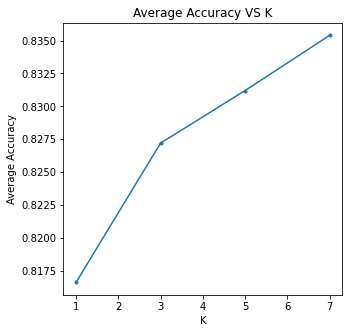

In [135]:
plt.figure(figsize=(5, 5))
plt.plot(K, accAvg, marker='.')
plt.xlabel("K")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy VS K")
plt.savefig("P4_AvgAccVsK.png")
plt.show()

In [136]:
P4_result = {
    "K": K,
    "Accuracy1": acc1,
    "Accuracy2": acc2,
    "Accuracy3": acc3,
    "Accuracy4": acc4,
    "Accuracy5": acc5,
}
P4_df = pd.DataFrame(P4_result)

In [137]:
P4_df

,K,Accuracy1,Accuracy2,Accuracy3,Accuracy4,Accuracy5
0,1,0.807,0.832,0.802,0.830,0.812
1,3,0.840,0.818,0.820,0.843,0.815
2,5,0.838,0.826,0.813,0.849,0.830
3,7,0.834,0.838,0.828,0.839,0.838


# P5: KNN ROC

In [45]:
Y_predict = predict(X_train1, Y_train1, X_test1, 5)

In [46]:
TPR = []
FPR = []

In [47]:
for c in np.arange(0.000, 1.001, 0.001):
    tp, tn, fp, fn, accuracy, precision, recall = compute_metrics(Y_predict, Y_test1.T[0], c)
    TPR.append(tp/(tp+fn))
    FPR.append(fp/(fp+tn))

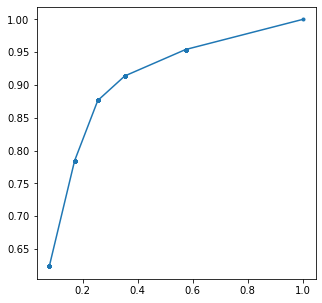

In [48]:
plt.figure(figsize=(5, 5))
plt.plot(FPR, TPR, marker='.')
plt.show()